<img src="https://github.com/Sengsathit/OCR_data_scientist_assets/blob/main/header_sante_publique_france.png?raw=true" alt="Alternative text" />

**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [1 - Tâches préliminaires](#toc2_)    
  - [Importations et configurations](#toc2_1_)    
  - [Chargement des données](#toc2_2_)    
- [2 - Préparation des données](#toc3_)    
  - [Aperçu des données](#toc3_1_)    
  - [Nettoyage et filtrage des données](#toc3_2_)    
    - [a) Création de fonctions ré-utilisables](#toc3_2_1_)    
    - [b) Variable cible et variables pertinentes](#toc3_2_2_)    
        - [- Traitements initaux](#toc3_2_2_1_1_)    
        - [- Choix de la variable cible](#toc3_2_2_1_2_)    
        - [- Choix des variables pertinentes pour le travail sur la variable cible](#toc3_2_2_1_3_)    
  - [Initialisation du DataFrame pour l'étude](#toc3_3_)    
    - [a) Création de fonctions ré-utilisables](#toc3_3_1_)    
    - [b) Construction du DataFrame à étudier](#toc3_3_2_)    
    - [c) Formattage des valeurs](#toc3_3_3_)    
        - [- Feature pnns_groups_1](#toc3_3_3_1_1_)    
        - [- Feature pnns_groups_2](#toc3_3_3_1_2_)    
    - [d) Traitement des valeurs aberrantes](#toc3_3_4_)    
      - [- Feature salt_100g](#toc3_3_4_1_)    
      - [- Feature sugars_100g](#toc3_3_4_2_)    
      - [- Feature saturated_fat_100g](#toc3_3_4_3_)    
      - [- Feature fiber_100g](#toc3_3_4_4_)    
  - [Traitement des valeurs manquantes](#toc3_4_)    
    - [a) Aperçu des valeurs manquantes](#toc3_4_1_)    
    - [b) Traitement par la moyenne et la médiane : energy_100g](#toc3_4_2_)    
    - [c) Traitement par KNN Imputer : salt_100g, sugars_100g, satured_fat_100g, fiber_100g](#toc3_4_3_)    
      - [- Feature salt_100g](#toc3_4_3_1_)    
      - [- Feature sugars_100g](#toc3_4_3_2_)    
      - [- Feature saturated_fat_100g](#toc3_4_3_3_)    
      - [- Feature fiber_100g](#toc3_4_3_4_)    
  - [Exportation du Dataframe de travail](#toc3_5_)    
- [3 - Analyses univariées et bivariées](#toc4_)    
  - [Fonctions réutilisables](#toc4_1_)    
  - [Analyse univariée : pnns_groups_1](#toc4_2_)    
  - [Analyse univariée : pnns_groups_2](#toc4_3_)    
  - [Analyse univariée : energy_100g](#toc4_4_)    
  - [Analyse univariée : proteins_100g](#toc4_5_)    
  - [Analyse univariée : fat_100g](#toc4_6_)    
  - [Analyse univariée : carbohydrates_100g](#toc4_7_)    
  - [Analyse univariée : salt_100g](#toc4_8_)    
  - [Analyse univariée : sugars_100g](#toc4_9_)    
  - [Analyse univariée : saturated_fat_100g](#toc4_10_)    
  - [Analyse univariée : fiber_100g](#toc4_11_)    
  - [Analyse bivariée : fat_100g vs energy_100g](#toc4_12_)    
  - [Analyse bivariée : sugars_100g vs carbohydrates_100g](#toc4_13_)    
  - [Analyse bivariée : saturated_fat_100g vs fat_100g](#toc4_14_)    
  - [Analyse bivariée : ANOVA à un facteur](#toc4_15_)    
- [4 - Analyse multivariée](#toc5_)    
  - [Fonctions ré-utilisables](#toc5_1_)    
  - [Corrélations entre les variables explicatives numériques continues](#toc5_2_)    
  - [Analyse en Composantes Principales (ACP)](#toc5_3_)    
    - [Séparation des données](#toc5_3_1_)    
    - [Centrage et réduction des données](#toc5_3_2_)    
    - [Entraînement du modèle PCA et détermination des valeurs propres](#toc5_3_3_)    
    - [Composantes principales](#toc5_3_4_)    
    - [Liaisons entre les variables : cercle des corrélations](#toc5_3_5_)    
    - [Variabilité entre les individus : représentation des individus sur les plans factoriels](#toc5_3_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction](#toc0_)

L'objectif de cette présente analyse exploratoire vise à soutenir l'agence Santé Publique France dans l'élaboration d'un mécanisme d'autocomplétion destiné aux utilisateurs de l'un de ses outils accessibles au grand public.

# <a id='toc2_'></a>[1 - Tâches préliminaires](#toc0_)

## <a id='toc2_1_'></a>[Importations et configurations](#toc0_)

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Configurer Pandas pour un affichage complet du contenu des colonnes
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.rcParams['figure.facecolor'] = '#FFFCF7'    # Définir la couleur de fond de la figure
plt.rcParams['axes.facecolor'] = '#FFFCF7'      # Définir la couleur de fond des axes

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/1843460889.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## <a id='toc2_2_'></a>[Chargement des données](#toc0_)

In [2]:
# Chargement du dataset
df = pd.read_csv("../datasets/fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)

# Uniformisation des noms de colonnes
df.columns = df.columns.str.lower().str.replace(" |-", "_", regex=True)

# <a id='toc3_'></a>[2 - Préparation des données](#toc0_)

## <a id='toc3_1_'></a>[Aperçu des données](#toc0_)

In [3]:
# Aperçu des premières lignes
df.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   
2          NaN      NaN       NaN            NaN   Torn & Glasser   
3          NaN      NaN       NaN            NaN        Grizzlies   
4          NaN      NaN       NaN            NaN   Bob's Red Mill   

       brands_tags categories categories_tags categories_fr origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   
2     torn-glasser        NaN             NaN           NaN     NaN   
3        grizzlies        NaN             NaN           NaN     NaN   
4   bob-s-red-mill        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_fr emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

  cities cities_tags purchase_places stores countries    countries_tags  \
0    NaN         NaN             NaN    NaN     en:FR         en:france   
1    NaN         NaN             NaN    NaN        US  en:united-states   
2    NaN         NaN             NaN    NaN        US  en:united-states   
3    NaN         NaN             NaN    NaN        US  en:united-states   
4    NaN         NaN             NaN    NaN        US  en:united-states   

  countries_fr                                   ingredients_text allergens  \
0       France                                                NaN       NaN   
1   États-Unis  Bananas, vegetable oil (coconut oil, corn oil ...       NaN   
2   États-Unis  Peanuts, wheat flour, sugar, rice flour, tapio...       NaN   
3   États-Unis  Organic hazelnuts, organic cashews, organic wa...       NaN   
4   États-Unis                                    Organic polenta       NaN   

  allergens_fr traces traces_tags traces_fr     serving_size 

In [4]:
# Aperçu des dernières lignes
df.tail()

code                                                url  \
320767  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320769  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320770  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320771   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      created_datetime  \
320767  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320768             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320769                      tomato  1422099377  2015-01-24T11:36:17Z   
320770  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320771             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
320767      1491244498   2017-04-03T18:34:58Z   
320768      1491244499   2017-04-03T18:34:59Z   
320769      1491244499   2017-04-03T18:34:59Z   
320770      1492340089   2017-04-16T10:54:49Z   
320771      1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
320767                                  Tomato & ricotta    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769                                            乐吧泡菜味薯片   
320770                           Tomates aux Vermicelles    
320771                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  packaging packaging_tags  \
320767                              NaN        1  Plastique      plastique   
320768                              NaN      NaN  Plastique      plastique   
320769  Leba pickle flavor potato chips     50 g  Plastique      plastique   
320770                              NaN      67g        NaN            NaN   
320771                              NaN      NaN  Plastique      plastique   

               brands    brands_tags    categories  \
320767       Panzani         panzani           NaN   
320768   Trader Joe's   trader-joe-s           NaN   
320769             乐吧             乐吧  Potato chips   
320770          Knorr          knorr           NaN   
320771  Market Pantry  market-pantry           NaN   

                                          categories_tags  \
320767                                                NaN   
320768                                                NaN   
320769  en:salty-snacks,en:appetizers,en:chips-and-fri...   
320770                                                NaN   
320771                                                NaN   

                                            categories_fr origins  \
320767                                                NaN     NaN   
320768                                                NaN     NaN   
320769  Snacks salés,Apéritif,Chips et frites,Chips,Ch...     NaN   
320770                                                NaN     NaN   
320771                                                NaN     NaN   

       origins_tags manufacturing_places manufacturing_places_tags labels  \
320767          NaN                  NaN                       NaN    NaN   
320768          NaN                  NaN                       NaN    NaN   
320769          NaN                  NaN                       NaN    NaN   
320770          NaN                  NaN                       NaN    NaN   
320771          NaN                  NaN                       NaN    NaN   

       labels_tags labels_fr emb_codes emb_codes_tags  \
320767         NaN       NaN       NaN            NaN   
320768         NaN       NaN       NaN            NaN   
320769         NaN       NaN       NaN            NaN   
320770         NaN       NaN       NaN            NaN   
320771         NaN       NaN       NaN            NaN   

       first_packaging_code_geo cities cities_tags purchase_places stores  \
320767

In [5]:
# Dimensions des données
df.shape

(320772, 162)

In [6]:
# Indications globales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water_hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [7]:
# Taux de valeurs manquantes global
df.isna().mean().mean()

0.7622157263195134

In [8]:
# Taux de valeurs manquantes par variable
df.isna().mean().sort_values(ascending=False)

water_hardness_100g                           1.000000
no_nutriments                                 1.000000
ingredients_that_may_be_from_palm_oil         1.000000
nutrition_grade_uk                            1.000000
nervonic_acid_100g                            1.000000
erucic_acid_100g                              1.000000
mead_acid_100g                                1.000000
elaidic_acid_100g                             1.000000
butyric_acid_100g                             1.000000
caproic_acid_100g                             1.000000
ingredients_from_palm_oil                     1.000000
lignoceric_acid_100g                          1.000000
cerotic_acid_100g                             1.000000
melissic_acid_100g                            1.000000
chlorophyl_100g                               1.000000
glycemic_index_100g                           1.000000
myristic_acid_100g                            0.999997
palmitic_acid_100g                            0.999997
caprylic_a

## <a id='toc3_2_'></a>[Nettoyage et filtrage des données](#toc0_)

### <a id='toc3_2_1_'></a>[a) Création de fonctions ré-utilisables](#toc0_)

Pour obtenir des colonnes selon des critères spécifiques

In [9]:
# Fonction pour récupérer les colonnes présentant un taux de valeurs manquantes selon un seuil donné et une méthode de comparaison donnée ("supérieur à" ou "inférieur à")
def get_columns_with_data(df_to_parse: pd.DataFrame, cols = [], dtype: str = None, less_than = False, threshold = 0.5, ascending = False, display_result = False) -> pd.DataFrame:

    # Filtrer par colonne si demandé
    if len(cols) > 0:
        df_to_parse = df_to_parse[cols]

    # Ensemble des taux de remplissage de chaque colonne étudiée
    existing_values_mean = (~df_to_parse.isna()).mean()

    # Définir la fonction de comparaison en fonction de la valeur de 'less_than'
    comparison = (lambda x,y: x <= y) if less_than else (lambda x,y: x >= y)

    # Liste des colonnes
    columns = [
        (col, val) for col, val in existing_values_mean.items()
        if comparison(val, threshold) and (dtype is None or df_to_parse[col].dtype == dtype)
    ]
    # Colonnes triées selon le critère de tri en entrée de la fonction
    sorted_columns = sorted(columns, key=lambda x: x[1], reverse=not ascending)
    
    # Affichage du résultat si demandé
    if display_result:
        for col, val in sorted_columns:
            print(f"{col} : {round(val, 4)}")

    # Liste des colonnes sélectionnées (premier élément de chaque tuple (nom_colonne, taux_de_remplissage))
    return [t[0] for t in sorted_columns]

Pour filtrer les colonnes d'un DataFrame selon des critères spécifiques

In [10]:
# Fonction pour conserver les colonnes présentant un taux de valeurs manquantes inférieur ou égal à un seuil donné
def drop_columns_with_few_data(df_to_clean: pd.DataFrame, threshold: float) -> pd.DataFrame:
    # Liste des colonnes à conserver
    columns_to_keep = [col for col, val in df_to_clean.isna().mean().items() if val <= threshold]
    # DataFrame avec les colonnes filtrées
    return df_to_clean[columns_to_keep]

Pour initialiser le Dataframe à partir duquel nous allons travailler

In [11]:
# Fonction pour initialiser et récupérer le Dataframe de travail
def get_working_dataframe(df_to_parse: pd.DataFrame, columns_to_drop = []) -> pd.DataFrame:
    # Copie du Dataframe initial
    working_dataframe = df_to_parse.copy()
    # Suppression des produits sans code
    working_dataframe = working_dataframe.dropna(subset=["code"])
    # Suppression des colonnes inutiles
    working_dataframe = working_dataframe.drop(columns_to_drop, axis=1)
    
    return working_dataframe


Pour récupérer, dans un DataFrame, la liste des colonnes ayant des valeurs catégorielles unitaires

In [12]:
# Fonction pour rechercher, dans un DataFrame, les colonnes comportant des valeurs catégorielles unitaires (i.e non composées ou apparentées à une liste)
def get_categorial_columns_with_unary_value(df_to_parse: pd.DataFrame):
    return [column for column in df_to_parse.columns if df_to_parse[column].dtype == 'object' and not df_to_parse[column].str.contains(',').any()]

### <a id='toc3_2_2_'></a>[b) Variable cible et variables pertinentes](#toc0_)

##### <a id='toc3_2_2_1_1_'></a>[- Traitements initaux](#toc0_)

In [13]:
# Colonnes que nous jugeons inutiles
columns_to_drop = ["url","creator","created_t","created_datetime","last_modified_t","last_modified_datetime", "quantity"]

# Dataframe initial
df_data = get_working_dataframe(df, columns_to_drop)

# Il existe dans le Dataframe des valeurs "unknown", nous les remplaçons pas des valeurs manquantes pour faciliter la suite du travail
df_data = df_data.mask(df_data == "unknown", np.nan)

##### <a id='toc3_2_2_1_2_'></a>[- Choix de la variable cible](#toc0_)

In [14]:
# Vérifier quelles sont les variables que nous pourrions cibler. De préférences des variables avec des valeurs qualitatives unitaires
target_columns = get_categorial_columns_with_unary_value(df_data)
target_columns

['code',
 'cities',
 'allergens_fr',
 'additives',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url']

In [15]:
# Vérifier les variables filtrées à notre disposition. Nous ciblerons, parmi les variables filtrées ayant moins de 50% de données, celle qui sera la plus appropirée pour notre objectif.
# Ici nous choisions "pnns_groups_1" qui est l'indicateur de catégorisation des différents aliment 
columns_with_data = get_columns_with_data(df_to_parse=df_data, cols=target_columns, less_than=True, threshold=0.50, dtype=object, ascending=False, display_result=True)
target_feature = "pnns_groups_1" 

main_category : 0.263
main_category_fr : 0.263
image_url : 0.2364
image_small_url : 0.2364
pnns_groups_2 : 0.2241
pnns_groups_1 : 0.2148
cities : 0.0
allergens_fr : 0.0


In [16]:
# Suppression des produits n'ayant pas de valeurs pour la colonne cible
df_data = df_data.dropna(subset=target_feature)

# Vérification des variables ayant plus de 50% de taux de remplissage de données. Nous sélectionnerons parmi ces variables filtrées celles qui nous semblent pertinentes pour suggérer les valeurs de la variable cible
columns_with_data = get_columns_with_data(df_to_parse=df_data, less_than=False, threshold=0.3, ascending=False, display_result=True)

code : 1.0
categories : 1.0
categories_tags : 1.0
categories_fr : 1.0
pnns_groups_1 : 1.0
pnns_groups_2 : 1.0
states : 1.0
states_tags : 1.0
states_fr : 1.0
main_category : 1.0
main_category_fr : 1.0
countries : 0.9992
countries_tags : 0.9992
countries_fr : 0.9992
product_name : 0.9921
brands : 0.9859
brands_tags : 0.9858
packaging_tags : 0.8942
packaging : 0.8942
ingredients_text : 0.8395
additives_n : 0.8395
ingredients_from_palm_oil_n : 0.8395
ingredients_that_may_be_from_palm_oil_n : 0.8395
additives : 0.8393
energy_100g : 0.7988
proteins_100g : 0.7919
fat_100g : 0.7647
carbohydrates_100g : 0.7587
salt_100g : 0.755
sodium_100g : 0.7549
sugars_100g : 0.7527
saturated_fat_100g : 0.7497
nutrition_grade_fr : 0.7345
nutrition_score_fr_100g : 0.7345
nutrition_score_uk_100g : 0.7345
image_url : 0.7241
image_small_url : 0.7241
purchase_places : 0.6822
generic_name : 0.6296
stores : 0.6154
labels_tags : 0.5142
labels_fr : 0.5142
labels : 0.5132
fiber_100g : 0.4815
additives_tags : 0.4608
ad

##### <a id='toc3_2_2_1_3_'></a>[- Choix des variables pertinentes pour le travail sur la variable cible](#toc0_)

In [17]:
# Pour augmenter la qualité des données saisie par l'utilisateur pour la variable pnns_groups_1, nous allons nous intéresser à certaines autres variables qui permettraient de produire des suggestions :
# pnns_groups_2, energy_100g, proteins_100g, fat_100g, carbohydrates_100g, salt_100g, sugars_100g
cols_nutrients = ["proteins_100g", "fat_100g","carbohydrates_100g","salt_100g","sugars_100g", "saturated_fat_100g", "fiber_100g"]
columns_for_study = ["pnns_groups_2","energy_100g"] + cols_nutrients

# Nous pouvons vérifier que l'ensemble des colonnes pertinentes sont remplies à +50%
columns_with_data = get_columns_with_data(df_to_parse=df_data, cols=columns_for_study, less_than=False, threshold=0, ascending=False, display_result=True)

pnns_groups_2 : 1.0
energy_100g : 0.7988
proteins_100g : 0.7919
fat_100g : 0.7647
carbohydrates_100g : 0.7587
salt_100g : 0.755
sugars_100g : 0.7527
saturated_fat_100g : 0.7497
fiber_100g : 0.4815


## <a id='toc3_3_'></a>[Initialisation du DataFrame pour l'étude](#toc0_)

### <a id='toc3_3_1_'></a>[a) Création de fonctions ré-utilisables](#toc0_)

In [18]:
# Fonction permettant de vérifier les valeurs nulles d'une colonne
def check_na_for_column(df_to_check: pd.DataFrame, col: str):
    return df_to_check[col].isna().any()

In [19]:
# Fonction permettant de vérifier les valeurs unique pour une colonne donnée
def check_unique_value_for_column(df_to_check: pd.DataFrame, col: str):
    return df_to_check[col].unique()

In [20]:
# Fonction permettant d'uniformiser les valeurs qualitatives d'un colonne : minuscules, pas d'espace mais des tirest à la place
def standardize_qualitative_values_for_column(df_to_update: pd.DataFrame, col: str):
    df_to_update.loc[:, col] = df_to_update[col].str.lower().str.replace(" ", "-")

In [21]:
# Fonction permettant d'inverser le signe des valeurs négatives d'un ensemble de colonnes
def invert_negative_values_for_columns(df_to_update: pd.DataFrame, cols: list[str]):
    # Pour chaque colonne, inverser la valeur si valeur négative
    for col in cols:
        df_to_update[col] = df_to_update[col].apply(lambda x: -x if x < 0 else x)

In [22]:
# Fonction permettant de remplacer une valeur par une autre pour une colonne donnée
def replace_values_for_column(df_to_update: pd.DataFrame, col: str, old_value: str, new_value: str):
    df_to_update.loc[:, col] = df_to_update[col].replace(old_value, new_value)

In [23]:
# Fonction permettant de remplacer une valeur par une autre pour une colonne donnée pour des codes produit donnés
def replace_values_for_column_product(df_to_update: pd.DataFrame, col: str, product_codes: list[str], new_value: str):
    df_to_update.loc[df_to_update.code.isin(product_codes), col] = new_value

In [24]:
# Fonction permettant de récupérer les lignes contenant des outliers pour une colonne donnée
def get_lines_with_outliers_for_column(df_to_check: pd.DataFrame, col: str, pnns_groups_1_to_check: str = None, display_info: bool = False):
    # Calcul des quartiles et de l'IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Bornes pour les outliers
    edge_low = Q1 - 1.5 * IQR
    edge_high = Q3 + 1.5 * IQR

    if pnns_groups_1_to_check is not None:
        df_to_return = df_to_check[(df_to_check[col] < edge_low) | (df_to_check[col] > edge_high)].query("pnns_groups_1 == @pnns_groups_1_to_check")
        if display_info:
            display(f"FEATURE : {col} -- PNNS_GROUP : {pnns_groups_1_to_check}")
            display(df_to_check.query("pnns_groups_1 == @pnns_groups_1_to_check")[col].describe())
            display(df_to_return.sort_values(col, ascending=False))
        
    else:
        df_to_return = df_to_check[(df_to_check[col] < edge_low) | (df_to_check[col] > edge_high)]
        if display_info:
            display(f"FEATURE : {col}")
            display(df_to_check[col].describe())
            display(df_to_return.sort_values(col, ascending=False))

    return df_to_return.sort_values(col, ascending=False)

In [25]:
# Fonction permettant de remplacer les valeurs manquantes par la médiane ou la moyenne
# Remplacement par la moyenne s'il n'y a pas d'ouliers pour une combinaison de 3 variables données, sinon remplacement par la médiane
def handle_na_for_feature_from_groups(df_to_update: pd.DataFrame, col_1: str, col_2: str, feature: str):
    for item_1 in df_to_update[col_1].unique():
        for item_2 in df_to_update[col_2].unique():
            mask = (df_to_update[col_1] == item_1) & (df_to_update[col_2] == item_2)
            df_temp = df_to_update.loc[mask]
            
            if not df_temp.empty:
                outliers = get_lines_with_outliers_for_column(df_temp, feature)
                # Remplacement par la médiane ou par la moyenne
                new_value = df_temp[feature].median() if not outliers.empty else df_temp[feature].mean()
                df_to_update.loc[mask & df_to_update[feature].isna(), feature] = new_value

In [26]:
# Fonction permettant de déterminer la meilleure valeur de k pour le KNN Imputer
def get_best_k_value(df_to_check: pd.DataFrame, cols_reference: list[str], feature: str, k_max:int):

    k_values = []
    rmse_values = []

    for i in range(1, k_max + 1):

        # Sélection des lignes pour les valeurs de feature non null
        df_for_imputer = df_to_check.loc[~df_to_check[feature].isna(), :].copy()

        # Valeurs initiales de la feature
        feature_values_initial = np.array(df_for_imputer.loc[:, feature])

        # Sélectionne aléatoirement 25% des indices
        # Affectation de la valeurs NaN à ces indices pour la variable spécifiée
        indices = df_for_imputer.sample(frac=0.25, random_state=42).index  # Sélectionnez aléatoirement 25% des indices
        df_for_imputer.loc[indices, feature] = np.nan  # Affectez NaN à ces indices pour la colonne spécifiée

        # Feature qui vont servir pour inférrer les valeurs pour les valeurs manquantes
        cols_reference.append(feature)

        # Données à traiter par l'imputer
        X_nutri = np.array(df_for_imputer[cols_reference])

        # Initialisation l'imputer KNN
        imputer = KNNImputer(n_neighbors=i)

        # Application de l'imputer
        X_nutri_imputed = imputer.fit_transform(X_nutri)
        df_for_imputer[cols_reference] = X_nutri_imputed

        # Valeurs résultant de l'imputation
        feature_values_imputed =  np.array(df_for_imputer.loc[:, feature])

        # Calcul du RMSE
        mse = mean_squared_error(feature_values_initial, feature_values_imputed)
        rmse = np.sqrt(mse)

        k_values.append(i)
        rmse_values.append(rmse)

        print("k:", i)
        print("rmse:", rmse)

    plt.plot(k_values, rmse_values, marker="o")
    plt.xlabel("valeur de k")
    plt.ylabel("RMSE")
    plt.xticks(k_values);
    plt.title(f"KNN Imputer : valeur optimale de k pour {feature}")
    plt.savefig(f"../images/k_values_{feature}.png")
    plt.show()

In [27]:
# Fonction permettant de remplacer les valeurs manquantes par l'usage de l'algorithme des k plus proches voisins (KNN)
def handle_na_with_knn_imputer(df_to_update: pd.DataFrame, cols_reference: list[str], feature: str, k: int = 3):

    cols_reference.append(feature)

    df_to_fill= df_to_update[cols_reference]

    # Données à traiter
    X_nutri = np.array(df_to_fill)

    # Initialisation l'imputer KNN
    imputer = KNNImputer(n_neighbors=k)

    # Application de l'imputation
    X_nutri_imputed = imputer.fit_transform(X_nutri)
    df_to_update[cols_reference] = X_nutri_imputed

### <a id='toc3_3_2_'></a>[b) Construction du DataFrame à étudier](#toc0_)

In [28]:
# Le DataFrame d'étude contient toutes les colonnes des variables pertinentes + les colonnes code produit + la colonne cible elle-même
df_study = df_data[["code", "pnns_groups_1"] + columns_for_study]
display(df_study.head())
df_study.shape

code          pnns_groups_1       pnns_groups_2  energy_100g  \
174  0000000290616  Fruits and vegetables          Vegetables       1210.0   
175  0000000394710          Sugary snacks  Biscuits and cakes       1520.0   
177  0000001071894   Cereals and potatoes               Bread          NaN   
180  0000001938067          Sugary snacks  Biscuits and cakes       1090.0   
182  0000005200016   Cereals and potatoes             Legumes          NaN   

     proteins_100g  fat_100g  carbohydrates_100g  salt_100g  sugars_100g  \
174          22.00      12.0                23.0      2.160          0.0   
175           4.79      14.4                54.1      0.922         28.1   
177            NaN       NaN                 NaN        NaN          NaN   
180           3.33      10.7                38.7      0.647         24.7   
182            NaN       NaN                 NaN        NaN          NaN   

     saturated_fat_100g  fiber_100g  
174                 7.0        2.00  
175                 NaN        2.05  
177                 NaN         NaN  
180                 2.0        2.00  
182                 NaN         NaN

(68889, 11)

In [29]:
# Suppression des lignes où toutes les valeurs des variables pertinentes quantitatives sont manquantes
cols_quantitative_to_check = [col for col in df_study.columns if col not in ["code", "pnns_groups_1", "pnns_groups_2"]]
mask_for_deletion = ~df_study[cols_quantitative_to_check].isna().all(axis=1)
df_study = df_study[mask_for_deletion]
df_study.shape

(55754, 11)

In [30]:
# La vérification des codes produit montre qu'il n'y a aucun produit en double
df_study.code.duplicated().any()

False

### <a id='toc3_3_3_'></a>[c) Formattage des valeurs](#toc0_)

In [31]:
# On s'assure que les colonnes xxx_100g ne contiennent que des valeurs numériques
df_study.select_dtypes(include=[np.number]).columns

Index(['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'salt_100g', 'sugars_100g', 'saturated_fat_100g', 'fiber_100g'],
      dtype='object')

In [32]:
# Il existe des valeurs négatives dans le DataFrame d'étude pour les valeurs nutritives. Nous allons changer leurs signes.
display(df_study.loc[df_study[cols_quantitative_to_check].values < 0])
invert_negative_values_for_columns(df_to_update=df_study, cols=cols_quantitative_to_check)

code            pnns_groups_1 pnns_groups_2  energy_100g  \
195761  3161712000928  Milk and dairy products        Cheese       1379.0   

        proteins_100g  fat_100g  carbohydrates_100g  salt_100g  sugars_100g  \
195761           15.3      30.0                 0.8        1.4         -0.1   

        saturated_fat_100g  fiber_100g  
195761                21.0         NaN

##### <a id='toc3_3_3_1_1_'></a>[- Feature pnns_groups_1](#toc0_)

In [33]:
# Uniformisation des valeurs de la colonne "pnns_groups_1"
standardize_qualitative_values_for_column(df_to_update=df_study, col="pnns_groups_1")
check_unique_value_for_column(df_to_check=df_study, col="pnns_groups_1")

array(['fruits-and-vegetables', 'sugary-snacks', 'composite-foods',
       'fish-meat-eggs', 'beverages', 'fat-and-sauces',
       'cereals-and-potatoes', 'milk-and-dairy-products', 'salty-snacks'],
      dtype=object)

In [34]:
# Vérification de l'absence de valeurs manquantes pour la variable "pnns_groups_1" suite au drop des NaN
check_na_for_column(df_to_check=df_study, col="pnns_groups_1")

False

##### <a id='toc3_3_3_1_2_'></a>[- Feature pnns_groups_2](#toc0_)

In [35]:
# Uniformisation des valeurs de la colonne "pnns_groups_2"
standardize_qualitative_values_for_column(df_to_update=df_study, col="pnns_groups_2")

# Remplacement de la valeur "legumes" par "vegetables"
replace_values_for_column(df_to_update=df_study, col="pnns_groups_2", old_value="legumes", new_value="vegetables")

# Vérification des valeurs possibles dans la colonne "pnns_groups_2"
check_unique_value_for_column(df_to_check=df_study, col="pnns_groups_2")

array(['vegetables', 'biscuits-and-cakes', 'pizza-pies-and-quiche',
       'meat', 'sweets', 'sweetened-beverages', 'dressings-and-sauces',
       'one-dish-meals', 'soups', 'cereals', 'fruits', 'milk-and-yogurt',
       'fats', 'non-sugared-beverages', 'cheese', 'chocolate-products',
       'sandwich', 'bread', 'nuts', 'breakfast-cereals', 'appetizers',
       'artificially-sweetened-beverages', 'fruit-juices', 'eggs',
       'fish-and-seafood', 'dried-fruits', 'ice-cream', 'processed-meat',
       'potatoes', 'pastries', 'dairy-desserts', 'fruit-nectars',
       'salty-and-fatty-products'], dtype=object)

In [36]:
# Vérification de l'absence de valeurs manquantes pour la variable pnns_groups_2
check_na_for_column(df_to_check=df_study, col="pnns_groups_2")

False

### <a id='toc3_3_4_'></a>[d) Traitement des valeurs aberrantes](#toc0_)

In [37]:
# Il existe des valeurs > 100 pour les valeurs pour 100g de nutriments. Nous ignorons simplement ces données
df_study = df_study[~df_study[cols_nutrients].gt(100).any(axis=1)]
df_study.shape

(55744, 11)

In [38]:
# Il existe des produits pour lesquels la somme des valeurs de macronutriments (glucides, protéines, lipides) dépasse 100 pour 100g de produit. Nous ignorons simplement ces données.
df_study = df_study[(df_study.proteins_100g + df_study.fat_100g + df_study.carbohydrates_100g) <= 100]
df_study.shape

(51634, 11)

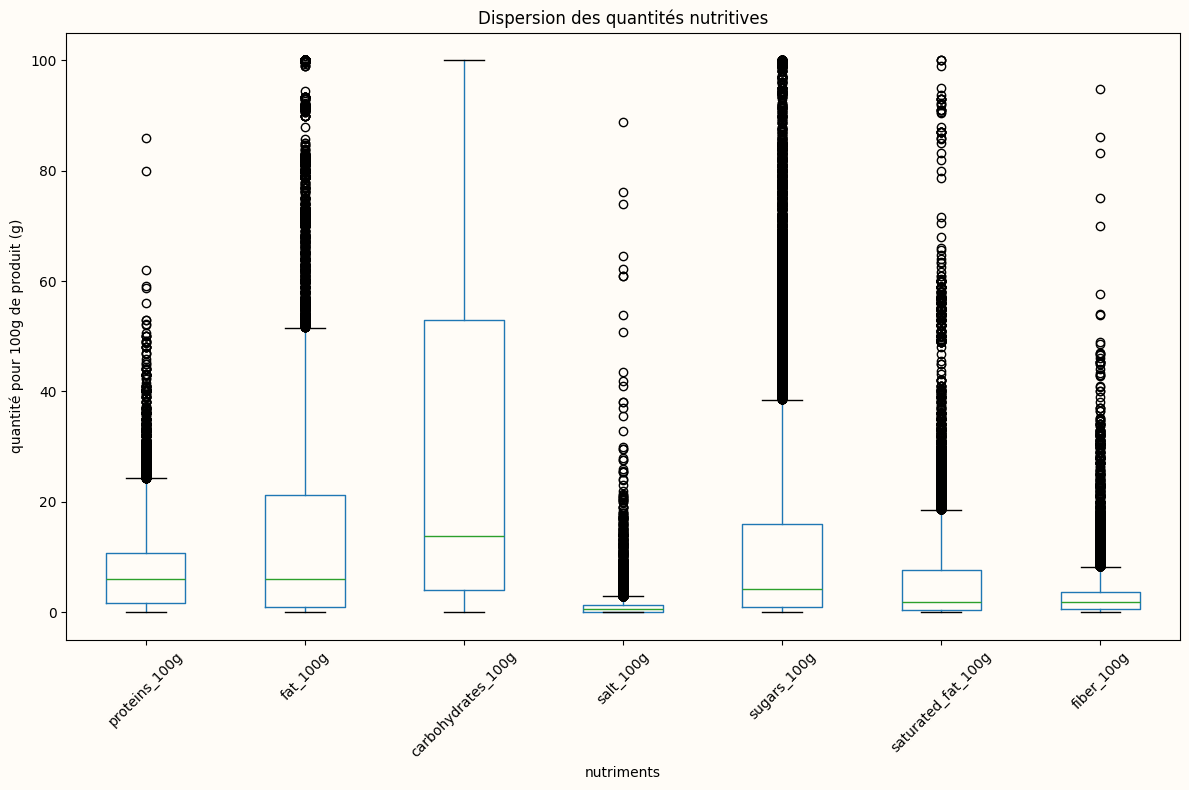

In [39]:
plt.figure(figsize=(12, 8))
df_study.boxplot(column=cols_nutrients)
plt.title('Dispersion des quantités nutritives')
plt.xlabel('nutriments')
plt.ylabel('quantité pour 100g de produit (g)')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"../images/distribution_nutrients") 
plt.show()

Nous allons passer en revue l'ensembles des variable pertinentes et pour chacune de ces variables nous allons contrôler les valeurs à première vue aberrantes pour les les groupes pnns suivants :

* beverages
* cereals-and-potatoes
* composite-foods
* fat-and-sauces
* fish-meat-eggs
* fruits-and-vegetables
* milk-and-dairy-products
* salty-snacks
* sugary-snacks

#### <a id='toc3_3_4_1_'></a>[- Feature salt_100g](#toc0_)

In [40]:
# Variable à analyser
feature = "salt_100g"

Pour le groupe pnns "beverages"

In [41]:
# Cibler un groupe pnns spécifique
pnns_group = "beverages"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "beverages" des produits présentent des valeurs trop élevées. Nous allons les remplacer par la médiane correspondant au pnns group et à la variable étudiée
median_for_feature_from_pnns_group = df_study.query("pnns_groups_1 == @pnns_group")[feature].median()
product_codes = df_outliers["code"]
replace_values_for_column_product(df_study, feature, product_codes, median_for_feature_from_pnns_group)

Pour le groupe pnns "cereals-and-potatoes"

In [42]:
# Cibler un groupe pnns spécifique
pnns_group = "cereals-and-potatoes"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "cereals-and-potatoes", il n'y a aucune valeur trop élevée. Aucune action requise.

Pour le groupe pnns "composite-foods"

In [43]:
# Cibler un groupe pnns spécifique
pnns_group = "composite-foods"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "composite-foods", il n'y a aucune valeur trop élevée. Aucune action requise.

Pour le groupe pnns "fat-and-sauces"

In [44]:
# Cibler un groupe pnns spécifique
pnns_group = "fat-and-sauces"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fat-and-sauces", il n'y a aucune valeur trop élevée par rapport au type de produits (sauces salés). Aucune action requise.

Pour le groupe pnns "fish-meat-eggs"

In [45]:
# Cibler un groupe pnns spécifique
pnns_group = "fish-meat-eggs"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fish-meat-eggs", seul le produit 5999563456568 présente une valeur trop élevée par rapport à son type de produit. Nous allons minimiser cette valeur
replace_values_for_column_product(df_study, feature, ["5999563456568"], 0.5)

Pour le groupe pnns "fruits-and-vegetables"

In [46]:
# Cibler un groupe pnns spécifique
pnns_group = "fruits-and-vegetables"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fruits-and-vegetables" 2 produits présentent des valeurs trop élevées. Nous allons les remplacer par la médiane correspondant au pnns group et à la variable étudiée
median_for_feature_from_pnns_group = df_study.query("pnns_groups_1 == @pnns_group")[feature].median()
product_codes = df_outliers.head(2)["code"]
replace_values_for_column_product(df_study, feature, product_codes, median_for_feature_from_pnns_group)

Pour le groupe pnns "milk-and-dairy-products"

In [47]:
# Cibler un groupe pnns spécifique
pnns_group = "milk-and-dairy-products"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "milk-and-dairy-products", il n'y a aucune valeur trop élevée par rapport au type de produits (produit fromager). Aucune action requise.

Pour le groupe pnns "salty-snacks"

In [48]:
# Cibler un groupe pnns spécifique
pnns_group = "salty-snacks"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "salty-snacks", 1 produit semble être mal saisie pour plusieurs des feature, nous le supprimons. 1 autre produit présente une valeur trop élevée, nous corrigeons cette valeur
df_study = df_study[df_study.code != "0028400040037"]
replace_values_for_column_product(df_study, feature, ["3018930004934"], 3)

Pour le groupe pnns "sugary-snacks"

In [49]:
# Cibler un groupe pnns spécifique
pnns_group = "sugary-snacks"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "sugary-snacks" plusieurs produits présentent des valeurs trop élevées pour le type de produit (sucrés). Nous allons les remplacer par la médiane correspondant au pnns group et à la variable étudiée
median_for_feature_from_pnns_group = df_study.query("pnns_groups_1 == @pnns_group")[feature].median()
product_codes = df_outliers["code"]
replace_values_for_column_product(df_study, feature, product_codes, median_for_feature_from_pnns_group)

#### <a id='toc3_3_4_2_'></a>[- Feature sugars_100g](#toc0_)

In [50]:
# Variable à analyser
feature = "sugars_100g"

Pour le groupe pnns "beverages"

In [51]:
# Cibler un groupe pnns spécifique
pnns_group = "beverages"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "beverages", il n'y a aucune valeur trop élevée par rapport au type de produits (boissons sucrés). Aucune action requise.

Pour le groupe pnns "cereals-and-potatoes"

In [52]:
# Cibler un groupe pnns spécifique
pnns_group = "cereals-and-potatoes"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "cereals-and-potatoes" plusieurs produits présentent des valeurs trop élevées pour le type de produit. Nous allons corriger manuellement en tenant compte des vraies valeurs.
median_for_feature_from_pnns_group = df_study.query("pnns_groups_1 == @pnns_group")[feature].median()
product_codes = df_outliers["code"]
replace_values_for_column_product(df_study, feature, product_codes, median_for_feature_from_pnns_group)

Pour le groupe pnns "composite-foods"

In [53]:
# Cibler un groupe pnns spécifique
pnns_group = "composite-foods"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "composite-foods", il n'y a aucune valeur trop élevée. Aucune action requise.

Pour le groupe pnns "fat-and-sauces"

In [54]:
# Cibler un groupe pnns spécifique
pnns_group = "fat-and-sauces"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fat-and-sauces" plusieurs produits présentent des valeurs trop élevées pour le type de produit. Nous allons corriger manuellement en tenant compte des vraies valeurs des produits.
replace_values_for_column_product(df_study, feature, ["8022734000172"], 14)
replace_values_for_column_product(df_study, feature, ["9556041612661"], 0.7)
replace_values_for_column_product(df_study, feature, ["3547130027332"], 9)

Pour le groupe pnns "fish-meat-eggs"

In [55]:
# Cibler un groupe pnns spécifique
pnns_group = "fish-meat-eggs"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fish-meat-eggs", il n'y a aucune valeur trop élevée. Aucune action requise.

Pour le groupe pnns "fruits-and-vegetables"

In [56]:
# Cibler un groupe pnns spécifique
pnns_group = "fruits-and-vegetables"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fruits-and-vegetables", il n'y a aucune valeur trop élevée par rapport au type de produits (fruits et fruits secs). Aucune action requise.

Pour le groupe pnns "milk-and-dairy-products"

In [57]:
# Cibler un groupe pnns spécifique
pnns_group = "milk-and-dairy-products"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "milk-and-dairy-products", il n'y a aucune valeur trop élevée par rapport au type de produits (desserts lactés). Aucune action requise.

Pour le groupe pnns "salty-snacks"

In [58]:
# Cibler un groupe pnns spécifique
pnns_group = "salty-snacks"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "salty-snacks", 1 produit présente une valeur aberrante. Nous allons corriger manuellement en tenant compte des vraies valeurs du produit.
replace_values_for_column_product(df_study, feature, ["8480017086167"], 0.1)

Pour le groupe pnns "sugary-snacks"

In [59]:
# Cibler un groupe pnns spécifique
pnns_group = "sugary-snacks"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "sugary-snacks", il n'y a aucune valeur trop élevée par rapport au type de produits (snacks sucrés). Aucune action requise.

#### <a id='toc3_3_4_3_'></a>[- Feature saturated_fat_100g](#toc0_)

In [60]:
# Variable à analyser
feature = "saturated_fat_100g"

Pour le groupe pnns "beverages"

In [61]:
# Cibler un groupe pnns spécifique
pnns_group = "beverages"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "beverages", il n'y a aucune valeur trop élevée par rapport au type de produits (boissons). Aucune action requise.

Pour le groupe pnns "cereals-and-potatoes"

In [62]:
# Cibler un groupe pnns spécifique
pnns_group = "cereals-and-potatoes"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "cereals-and-potatoes", il n'y a aucune valeur trop élevée par rapport au type de produits (céréales). Aucune action requise.

Pour le groupe pnns "composite-foods"

In [63]:
# Cibler un groupe pnns spécifique
pnns_group = "composite-foods"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "composite-foods", il n'y a aucune valeur trop élevée par rapport au type de produits (plats cuisiinés). Aucune action requise.

Pour le groupe pnns "fat-and-sauces"

In [64]:
# Cibler un groupe pnns spécifique
pnns_group = "fat-and-sauces"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fat-and-sauces", il n'y a aucune valeur trop élevée par rapport au type de produits (produits gras). Aucune action requise.

Pour le groupe pnns "fish-meat-eggs"

In [65]:
# Cibler un groupe pnns spécifique
pnns_group = "fish-meat-eggs"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fat-and-sauces", il n'y a aucune valeur trop élevée par rapport au type de produits (viandes et poissons). Aucune action requise.

Pour le groupe pnns "fruits-and-vegetables"

In [66]:
# Cibler un groupe pnns spécifique
pnns_group = "fruits-and-vegetables"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fruits-and-vegetables", il n'y a aucune valeur trop élevée par rapport au type de produits (fruits et fruits secs). Aucune action requise.

Pour le groupe pnns "milk-and-dairy-products"

In [67]:
# Cibler un groupe pnns spécifique
pnns_group = "milk-and-dairy-products"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "milk-and-dairy-products", il n'y a aucune valeur trop élevée par rapport au type de produits (produits laitiers). Aucune action requise.

Pour le groupe pnns "salty-snacks"

In [68]:
# Cibler un groupe pnns spécifique
pnns_group = "salty-snacks"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "salty-snacks", 1 produit présente une valeur aberrante. Nous allons corriger manuellement en tenant compte des vraies valeurs du produit.
replace_values_for_column_product(df_study, feature, ["4250038940113"], 9.3)

Pour le groupe pnns "sugary-snacks"

In [69]:
# Cibler un groupe pnns spécifique
pnns_group = "sugary-snacks"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "sugary-snacks", 3 produits présentent des valeurs trop élevées ou ne se trouvant pas dans la bonne colonne. Nous les ignorons simplement.
df_study = df_study[~df_study.code.isin(["5410456070437", "3760076001345", "7622210153821"])]


#### <a id='toc3_3_4_4_'></a>[- Feature fiber_100g](#toc0_)

In [70]:
# Variable à analyser
feature = "fiber_100g"

Pour le groupe pnns "beverages"

In [71]:
# Cibler un groupe pnns spécifique
pnns_group = "beverages"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "beverages", il n'y a aucune valeur trop élevée par rapport au type de produits (boissons). Aucune action requise.

Pour le groupe pnns "cereals-and-potatoes"

In [72]:
# Cibler un groupe pnns spécifique
pnns_group = "cereals-and-potatoes"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "cereals-and-potatoes", il n'y a aucune valeur trop élevée par rapport au type de produits (céréales). Aucune action requise.

Pour le groupe pnns "composite-foods"

In [73]:
# Cibler un groupe pnns spécifique
pnns_group = "composite-foods"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "composite-foods", il n'y a aucune valeur trop élevée par rapport au type de produits (plats cuisiinés). Aucune action requise.

Pour le groupe pnns "fat-and-sauces"

In [74]:
# Cibler un groupe pnns spécifique
pnns_group = "fat-and-sauces"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fat-and-sauces", il n'y a aucune valeur trop élevée par rapport au type de produits (produits gras). Aucune action requise.

Pour le groupe pnns "fish-meat-eggs"

In [75]:
# Cibler un groupe pnns spécifique
pnns_group = "fish-meat-eggs"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fat-and-sauces", il n'y a aucune valeur trop élevée par rapport au type de produits (viandes et poissons). Aucune action requise.

Pour le groupe pnns "fruits-and-vegetables"

In [76]:
# Cibler un groupe pnns spécifique
pnns_group = "fruits-and-vegetables"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "fruits-and-vegetables", il n'y a aucune valeur trop élevée par rapport au type de produits (fruits et fruits secs). Aucune action requise.

Pour le groupe pnns "milk-and-dairy-products"

In [77]:
# Cibler un groupe pnns spécifique
pnns_group = "milk-and-dairy-products"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "milk-and-dairy-products" plusieurs produits présentent des valeurs trop élevées pour le type de produit. Nous allons corriger manuellement en tenant compte des vraies valeurs des produits.
replace_values_for_column_product(df_study, feature, ["3222110009958"], np.NaN)
replace_values_for_column_product(df_study, feature, ["3175681098749"], np.NaN)
replace_values_for_column_product(df_study, feature, ["3229820144207"], 1.7)

Pour le groupe pnns "salty-snacks"

In [78]:
# Cibler un groupe pnns spécifique
pnns_group = "salty-snacks"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "composite-foods", il n'y a aucune valeur trop élevée par rapport au type de produits (snack salé). Aucune action requise.

Pour le groupe pnns "sugary-snacks"

In [79]:
# Cibler un groupe pnns spécifique
pnns_group = "sugary-snacks"

# Aperçu des outliers
df_outliers = get_lines_with_outliers_for_column(df_to_check=df_study, col=feature, pnns_groups_1_to_check=pnns_group, display_info=False)

# Pour le groupe pnns "sugary-snacks" plusieurs produits présentent des valeurs trop élevées pour le type de produit. Nous allons corriger manuellement en tenant compte des vraies valeurs des produits.
replace_values_for_column_product(df_study, feature, ["7617400031133"], 4)
replace_values_for_column_product(df_study, feature, ["3760213860125"], 27.2)

## <a id='toc3_4_'></a>[Traitement des valeurs manquantes](#toc0_)

### <a id='toc3_4_1_'></a>[a) Aperçu des valeurs manquantes](#toc0_)

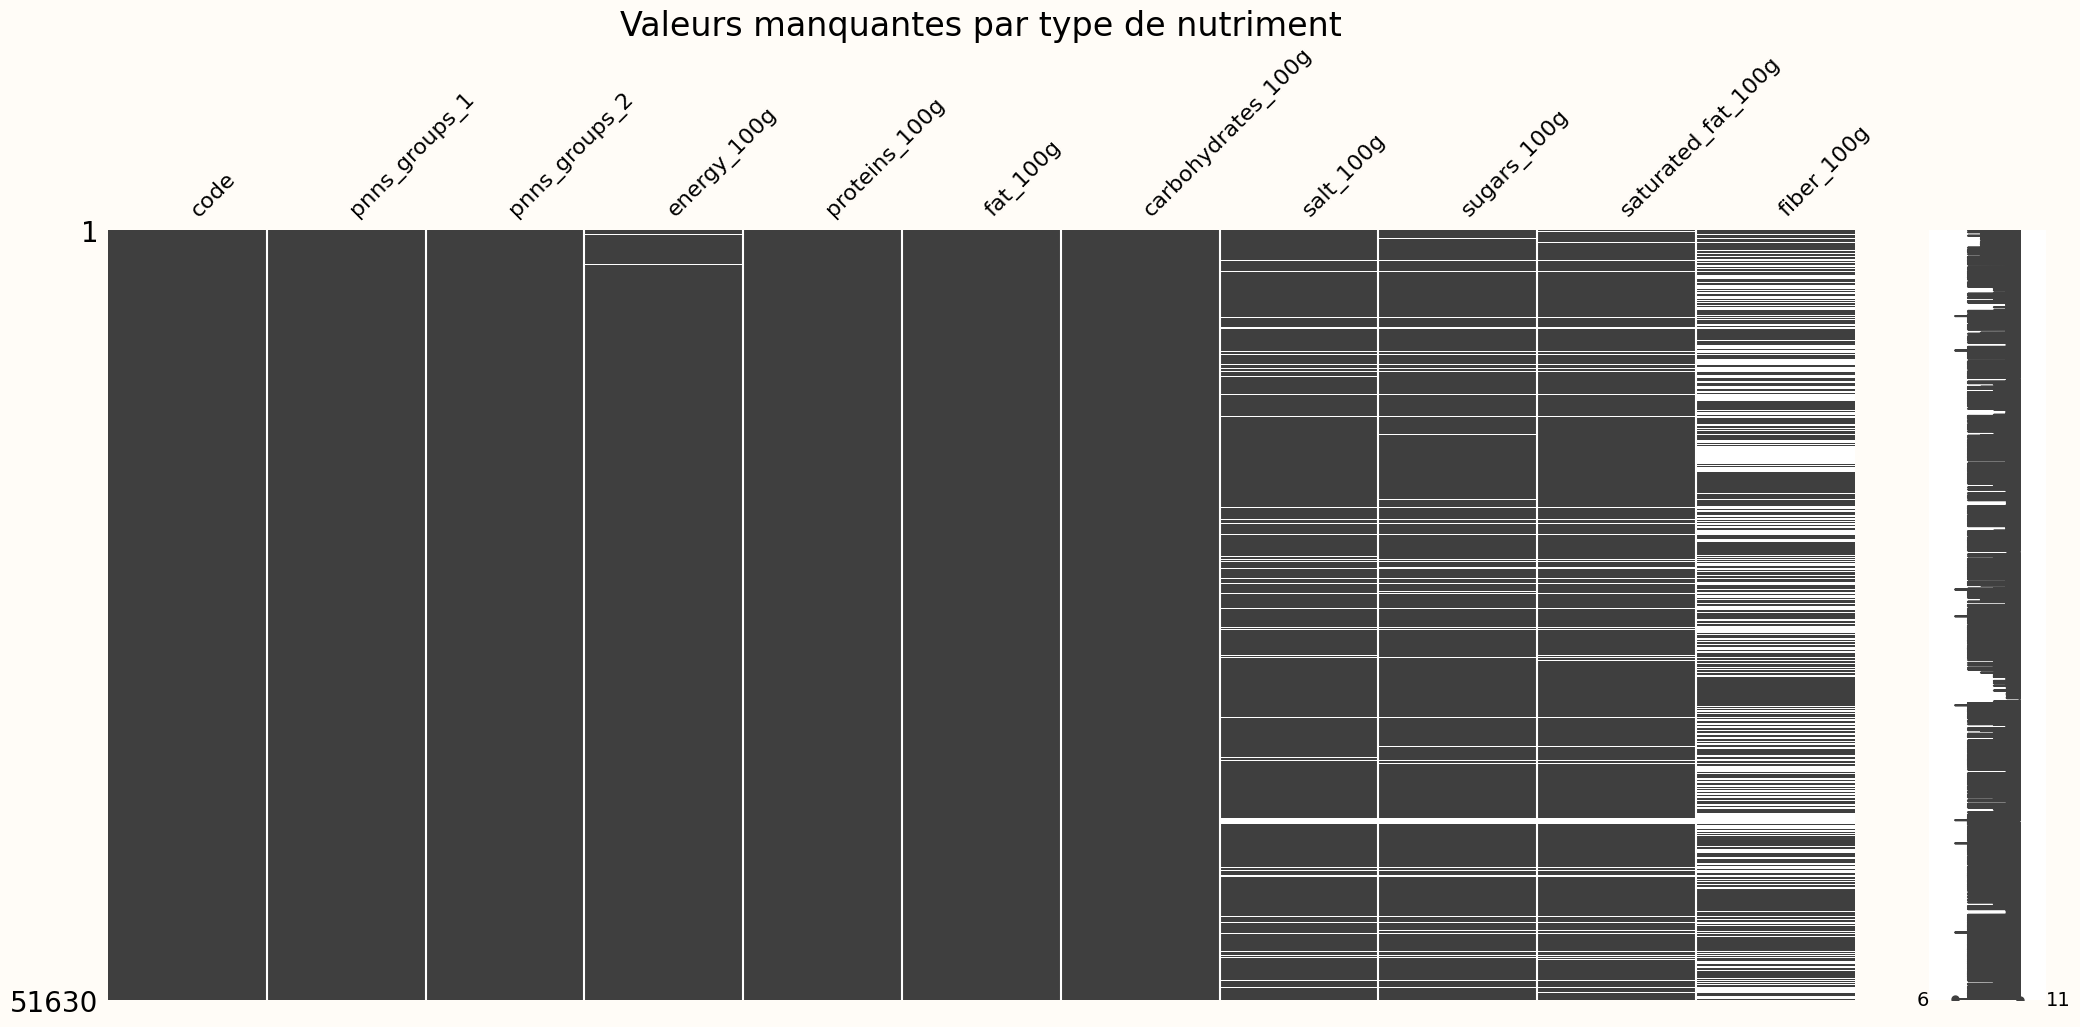

In [80]:
# Utilisation du module missingno pour un affichage simplifié
import missingno as msno

fig = msno.matrix(df_study)
plt.title("Valeurs manquantes par type de nutriment", fontsize = 24)
fig.get_figure().savefig("../images/na_matrix", bbox_inches = 'tight')

### <a id='toc3_4_2_'></a>[b) Traitement par la moyenne et la médiane : energy_100g](#toc0_)

Nous remplaçons les valeurs manquantes par la moyenne ou la médiane.

Nous tenons compte des groupes et des sous-groupes pour déterminer s'il existe des outliers.

S'il existe des outliers nous procédons à l'imputation des données par la médiane, dans le cas contraire par la moyenne.

In [81]:
handle_na_for_feature_from_groups(df_to_update=df_study, col_1="pnns_groups_1", col_2="pnns_groups_2", feature="energy_100g")

### <a id='toc3_4_3_'></a>[c) Traitement par KNN Imputer : salt_100g, sugars_100g, satured_fat_100g, fiber_100g](#toc0_)

A l'aide des varialbes n'ayant pas subit d'imputation ("proteins_100g", "fat_100g", "carbohydrates_100g"), nous allons utiliser l'algorithme KNN Imputer pour remplacer les valeurs manquantes d'une autre variable donnée.

Pour cela nous recherchons d'abord la valeur k optimale puis nous appliquons l'algorithme avec cette valeur k.

In [82]:
cols_reference = ["proteins_100g", "fat_100g", "carbohydrates_100g"]

#### <a id='toc3_4_3_1_'></a>[- Feature salt_100g](#toc0_)

In [83]:
# Variable à analyser
feature = "salt_100g"

k: 1
rmse: 0.7716161739766856
k: 2
rmse: 0.644376218601806
k: 3
rmse: 0.621806097131253
k: 4
rmse: 0.594608937686886
k: 5
rmse: 0.5828600530285036
k: 6
rmse: 0.5727414024431605
k: 7
rmse: 0.5646837148116387
k: 8
rmse: 0.5573126130553694


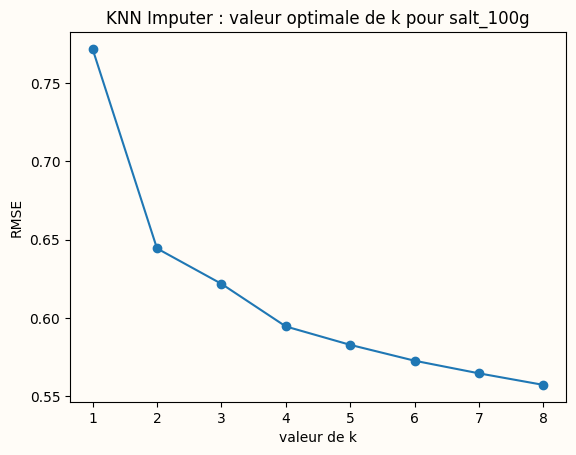

In [84]:
# Recherche du k optimal
# get_best_k_value(df_study, cols_reference, feature, k_max=8)

In [85]:
# La recherche du k optimal montre un coude pour k = 4
# Imputation de données
handle_na_with_knn_imputer(df_study, cols_reference, feature, k=4)

#### <a id='toc3_4_3_2_'></a>[- Feature sugars_100g](#toc0_)

In [86]:
# Variable à analyser
feature = "sugars_100g"

k: 1
rmse: 4.010370751560269
k: 2
rmse: 3.702403158179832
k: 3
rmse: 3.6017121200597426
k: 4
rmse: 3.578392051827561
k: 5
rmse: 3.5720347430423662
k: 6
rmse: 3.557841720485516
k: 7
rmse: 3.5405837080231266
k: 8
rmse: 3.5294689908464445


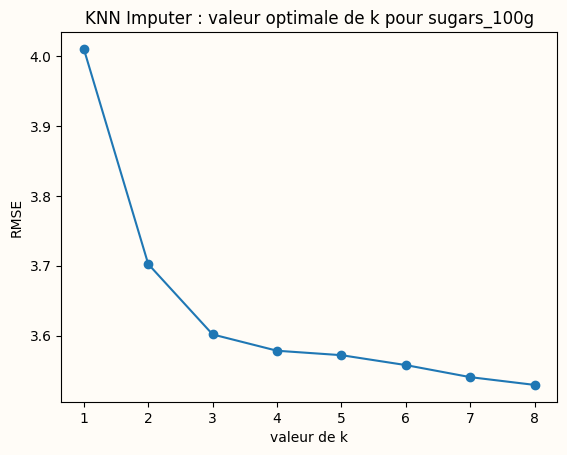

In [87]:
# Recherche du k optimal
# get_best_k_value(df_study, cols_reference, feature, k_max=8)

In [88]:
# La recherche du k optimal montre un coude pour k = 3
# Imputation de données
handle_na_with_knn_imputer(df_study, cols_reference, feature, k=3)

#### <a id='toc3_4_3_3_'></a>[- Feature saturated_fat_100g](#toc0_)

In [89]:
# Variable à analyser
feature = "saturated_fat_100g"

k: 1
rmse: 1.5307276185489196
k: 2
rmse: 1.8926582515222496
k: 3
rmse: 2.0801613501954694
k: 4
rmse: 1.3854478786298967
k: 5
rmse: 1.3981842466600598
k: 6
rmse: 1.3793801378588841
k: 7
rmse: 1.41821685326596
k: 8
rmse: 1.3959842725502074


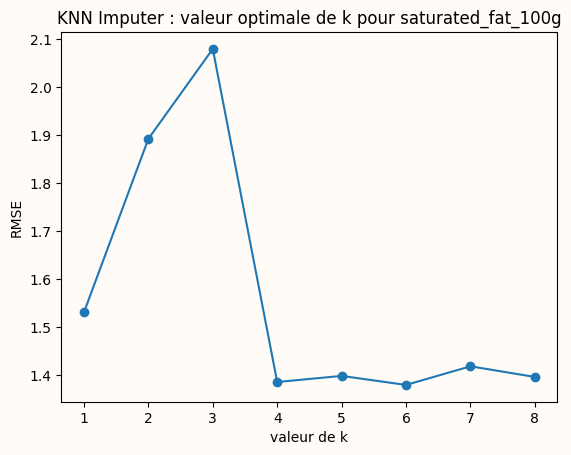

In [90]:
# Recherche du k optimal
# get_best_k_value(df_study, cols_reference, feature, k_max=8)

In [91]:
# La recherche du k optimal montre un coude pour k = 4
# Imputation de données
handle_na_with_knn_imputer(df_study, cols_reference, feature, k=4)

#### <a id='toc3_4_3_4_'></a>[- Feature fiber_100g](#toc0_)

In [92]:
# Variable à analyser
feature = "fiber_100g"

k: 1
rmse: 1.5490514229887153
k: 2
rmse: 1.3370031173535433
k: 3
rmse: 1.2710814488642244
k: 4
rmse: 1.2621563958534208
k: 5
rmse: 1.2642205294318505
k: 6
rmse: 1.273008775853039
k: 7
rmse: 1.2650292015004332
k: 8
rmse: 1.2654621344886576


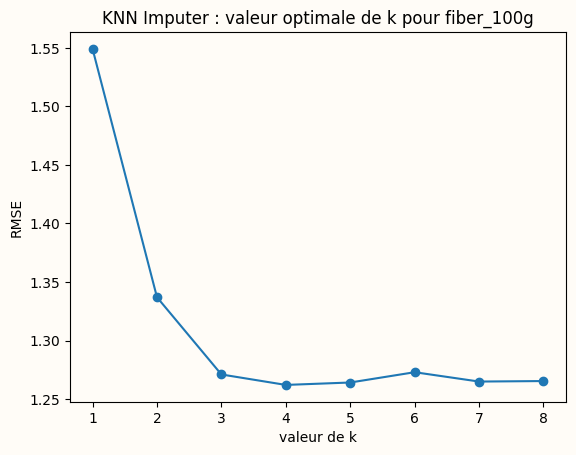

In [93]:
# Recherche du k optimal
# get_best_k_value(df_study, cols_reference, feature, k_max=8)

In [94]:
# La recherche du k optimal montre un coude pour k = 3
# Imputation de données
handle_na_with_knn_imputer(df_study, cols_reference, feature, k=3)

## <a id='toc3_5_'></a>[Exportation du Dataframe de travail](#toc0_)

In [95]:
# Exportation du DataFrame vers un fichier csv
df_study.to_csv("../datasets/products.csv", index=False)

# <a id='toc4_'></a>[3 - Analyses univariées et bivariées](#toc0_)

In [96]:
# Dataframe de travail
df_study = pd.read_csv("../datasets/products.csv")

## <a id='toc4_1_'></a>[Fonctions réutilisables](#toc0_)

In [97]:
# Fonction pour générer un diagramme en barre custom
def generate_bar_plot(
        df_to_check: pd.DataFrame, 
        feature: str, 
        figsize: tuple = (10, 6), 
        palette: str = None, 
        title: str = None, 
        x_label: str = None, 
        y_label: str = None, 
        rotate: bool = False, 
        show_x_ticks: bool = True):
    
    series = df_to_check[feature].value_counts()

    if rotate:
        x_values = series.values
        y_values = series.index
    else:
        x_values = series.index
        y_values = series.values

    plt.figure(figsize=figsize, dpi=100)
    ax = sns.barplot(x=x_values, y=y_values, palette=palette)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if show_x_ticks:
        ax.set_xticks(x_values)
        ax.set_xticklabels(x_values, rotation=45)
    plt.tight_layout()

    for container in ax.containers:
        ax.bar_label(container, fontsize=8)

    ax.figure.savefig(f"../images/bar_plot_{feature}")

In [98]:
# Fonction pour générer un digramme circulaire à partir d'une série Pandas
def generate_pie_plot(
        series: pd.Series, 
        figsize: tuple = (10, 10), 
        title: str = None):
    
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    ax.pie(series.values, labels=series.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(title, fontsize=16)
    plt.tight_layout()
    
    fig.savefig("../images/pie_plot_pnns_groups_1")

In [99]:
# Fonction pour générer des violin plot à partir de 2 features
def generate_violin_plot(
        df_to_check: pd.DataFrame, 
        feature_1: str = None, 
        feature_2: str = None, 
        figsize: tuple = (12, 8), 
        palette: str = "viridis", 
        title: str = None, 
        x_label: str = None, 
        y_label: str = None, 
        show_grid: bool = False):
    
    df_temp =  df_to_check.loc[:, [feature_1, feature_2]].copy()

    plt.figure(figsize=figsize)
    ax = sns.violinplot(x=feature_2, y=feature_1, data=df_temp, palette=palette)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    if show_grid:
        plt.grid(True)

    plt.tight_layout()

    ax.figure.savefig(f"../images/violin_plot_{feature_1}_{feature_2}")

In [100]:
# Fonction pour générer des catter plot à partir de 2 features
def generate_scatter_plot(
        df_to_check: pd.DataFrame, 
        title: str, 
        x_label: str, 
        y_label: str, 
        y_lim: str,
        feature_1: str, 
        feature_2: str,
        palette: str,
        hue: str,
        legend_title: str = None,
        figsize: tuple = (8,6)):

    plt.figure(figsize=figsize, dpi=100)
    ax = sns.scatterplot(df_to_check, x=feature_1, y=feature_2, palette=palette, hue=hue, legend=True)
    ax.set_title(title, fontsize=16, pad=30)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(0, y_lim)
    plt.legend(title=legend_title)  
    plt.tight_layout()
    ax.figure.savefig(f"../images/scatter_plot_{feature_1}_{feature_2}"
)


In [101]:
def execute_ANOVA(df_to_check: pd.DataFrame, factor: str, feature: str):

    unique_groups = df_to_check[factor].unique()

    groups_values = [df_to_check[df_to_check[factor] == group][feature] for group in unique_groups]

    F, p_value = stats.f_oneway(*groups_values)
    
    alpha = 0.05  # Niveau de signification habituel
    
    if p_value < alpha:
        decision = f"rejet de l'hypothèse nulle (H0), il y a une différence significative entre les groupes de la variable {factor}."
    else:
        decision = f"acceptation de l'hypothèse nulle (H0), aucune différence significative n'a été détectée entre les groupes de la variable {factor}."

    sys_float_min = sys.float_info.min  # valeur minimale du float system
    p_value_message = ("inférieure à " + str(sys_float_min)) if p_value < sys_float_min else p_value

    print(f"""
          Impact de la variable {factor} sur la variable {feature} par l'analyse de la variance
          ________________________________________________________________________________________________________

          Statistique de test (F) : {F}
          Valeur de la p-value : {p_value_message}
          Seuil alpha : {alpha}
          Décision : {decision}""")


## <a id='toc4_2_'></a>[Analyse univariée : pnns_groups_1](#toc0_)

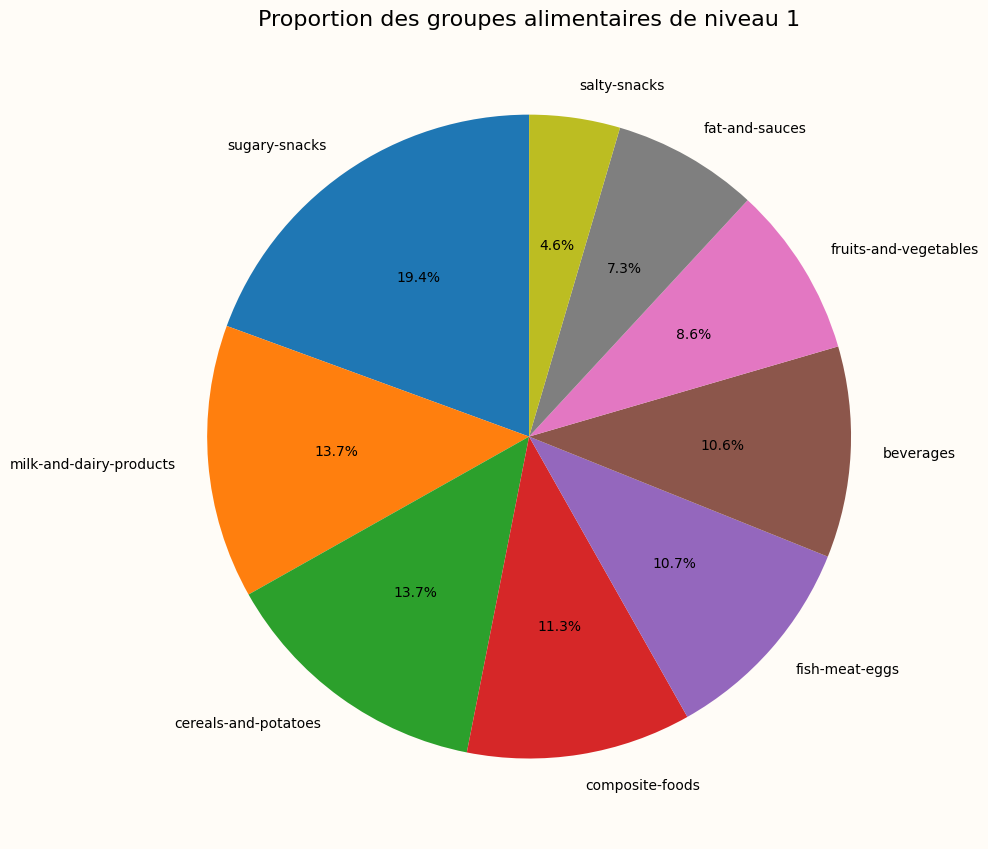

In [102]:
series_pnns_groups_1 = df_study["pnns_groups_1"].value_counts()

generate_pie_plot(
    series=series_pnns_groups_1, 
    title="Proportion des groupes alimentaires de niveau 1"
)

## <a id='toc4_3_'></a>[Analyse univariée : pnns_groups_2](#toc0_)

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/2388219645.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_values, y=y_values, palette=palette)


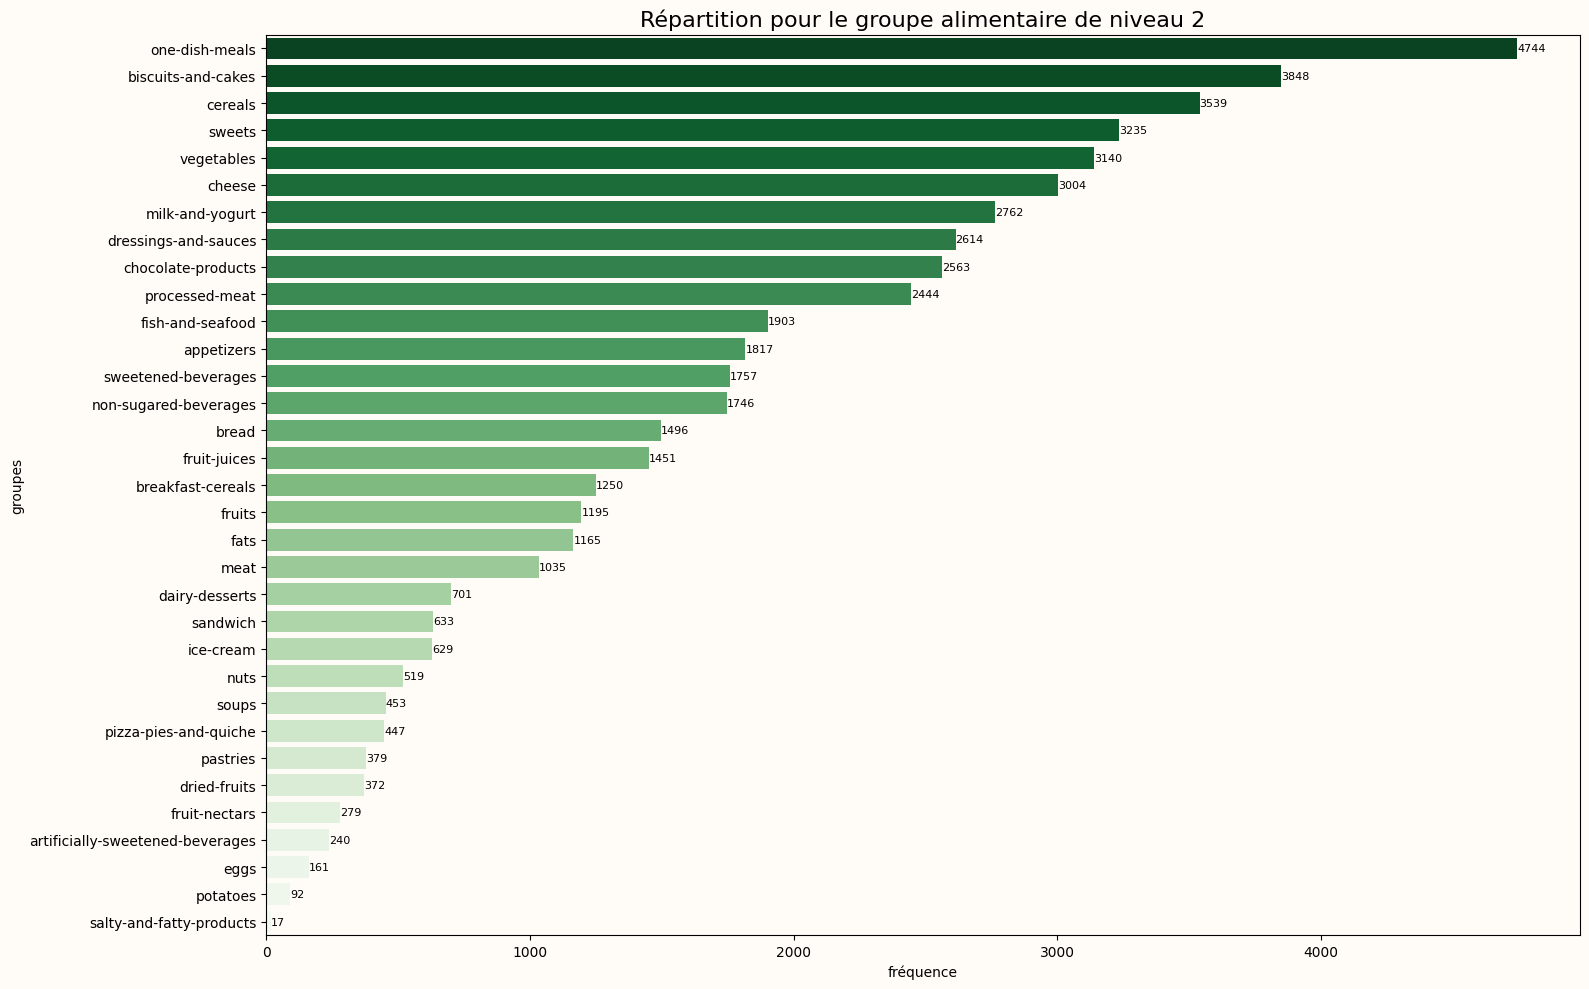

In [103]:
generate_bar_plot(
    df_to_check=df_study, 
    feature="pnns_groups_2", 
    figsize=(16, 10), 
    palette='Greens_r', 
    title="Répartition pour le groupe alimentaire de niveau 2", 
    x_label="fréquence", 
    y_label="groupes", 
    rotate=True, 
    show_x_ticks=False
)

## <a id='toc4_4_'></a>[Analyse univariée : energy_100g](#toc0_)

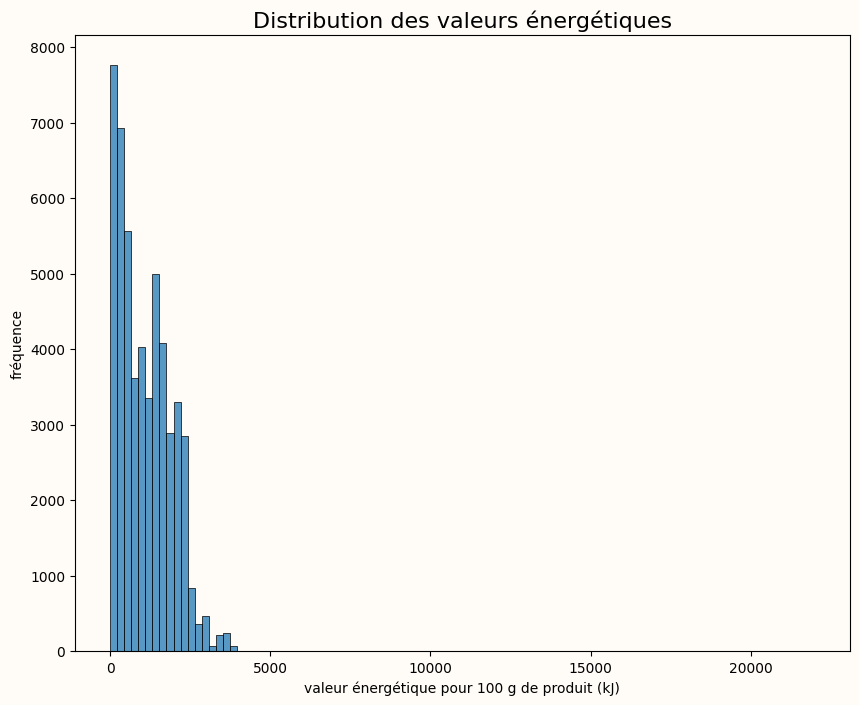

In [104]:
x_values = df_study["energy_100g"]

plt.figure(figsize=(10, 8))
ax = sns.histplot(df_study, x=x_values, bins=100)
ax.set_title("Distribution des valeurs énergétiques", fontsize=16)
ax.set_xlabel("valeur énergétique pour 100 g de produit (kJ)")
ax.set_ylabel("fréquence")

ax.figure.savefig("../images/distribution_energy_100g")

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/3477531772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=feature_2, y=feature_1, data=df_temp, palette=palette)


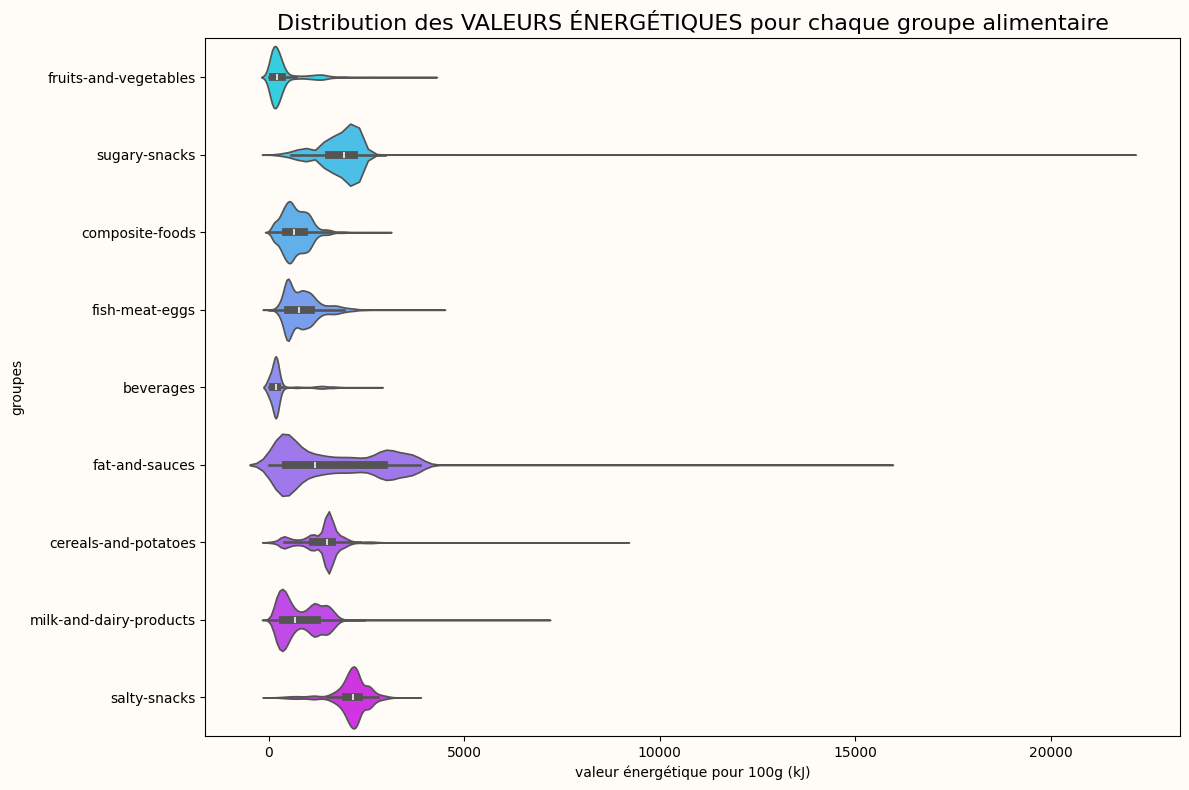

In [105]:
generate_violin_plot(
    df_to_check=df_study, 
    feature_1="pnns_groups_1", 
    feature_2="energy_100g", 
    title="Distribution des VALEURS ÉNERGÉTIQUES pour chaque groupe alimentaire", 
    x_label="valeur énergétique pour 100g (kJ)", 
    y_label="groupes",
    palette="cool"
)

# _______
# CONSTAT
# _______
# 
# Les fruits et légumes présentent une faible densité calorique, tandis que les graisses et sauces, et snack montrent une densité calorique plus élevée, ce qui est conforme aux connaissances nutritionnelles de base. 
# Les variations observées au sein des autres groupes suggèrent une bonne représentativité des données, ce qui indique que les données sont suffisamment fiables et diversifiées.

## <a id='toc4_5_'></a>[Analyse univariée : proteins_100g](#toc0_)

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/3477531772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=feature_2, y=feature_1, data=df_temp, palette=palette)


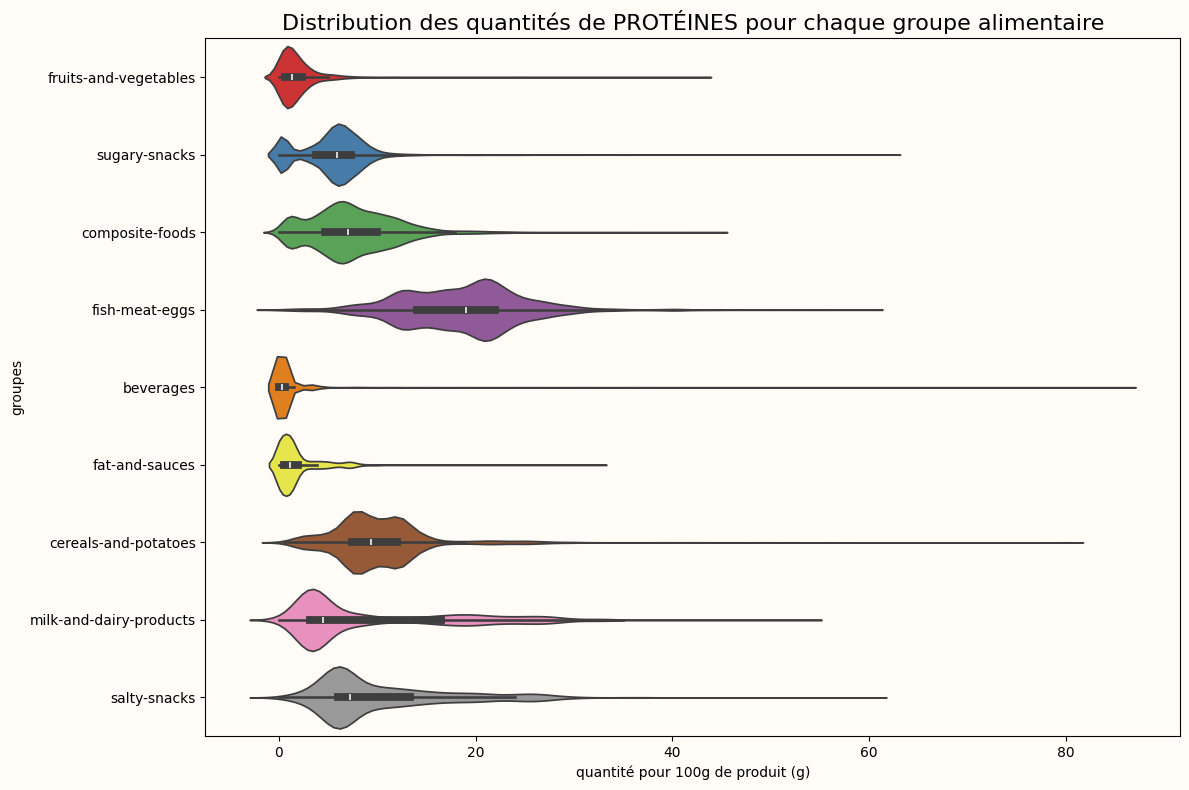

In [106]:
generate_violin_plot(
    df_to_check=df_study, 
    feature_1="pnns_groups_1", 
    feature_2="proteins_100g", 
    title="Distribution des quantités de PROTÉINES pour chaque groupe alimentaire", 
    x_label="quantité pour 100g de produit (g)", 
    y_label="groupes",
    palette="Set1"
)

# _______
# CONSTAT
# _______
#
# Les poissons, viandes et œufs montrent une teneur élevée en protéines, ce qui est caractéristique de ces aliments riches en protéines. 
# Les fruits et légumes présentent une faible quantité de protéines, conformément à leur profil nutritionnel. 
# Les variations observées indiquent une base de données cohérente et bien diversifiée.

## <a id='toc4_6_'></a>[Analyse univariée : fat_100g](#toc0_)

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/3477531772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=feature_2, y=feature_1, data=df_temp, palette=palette)


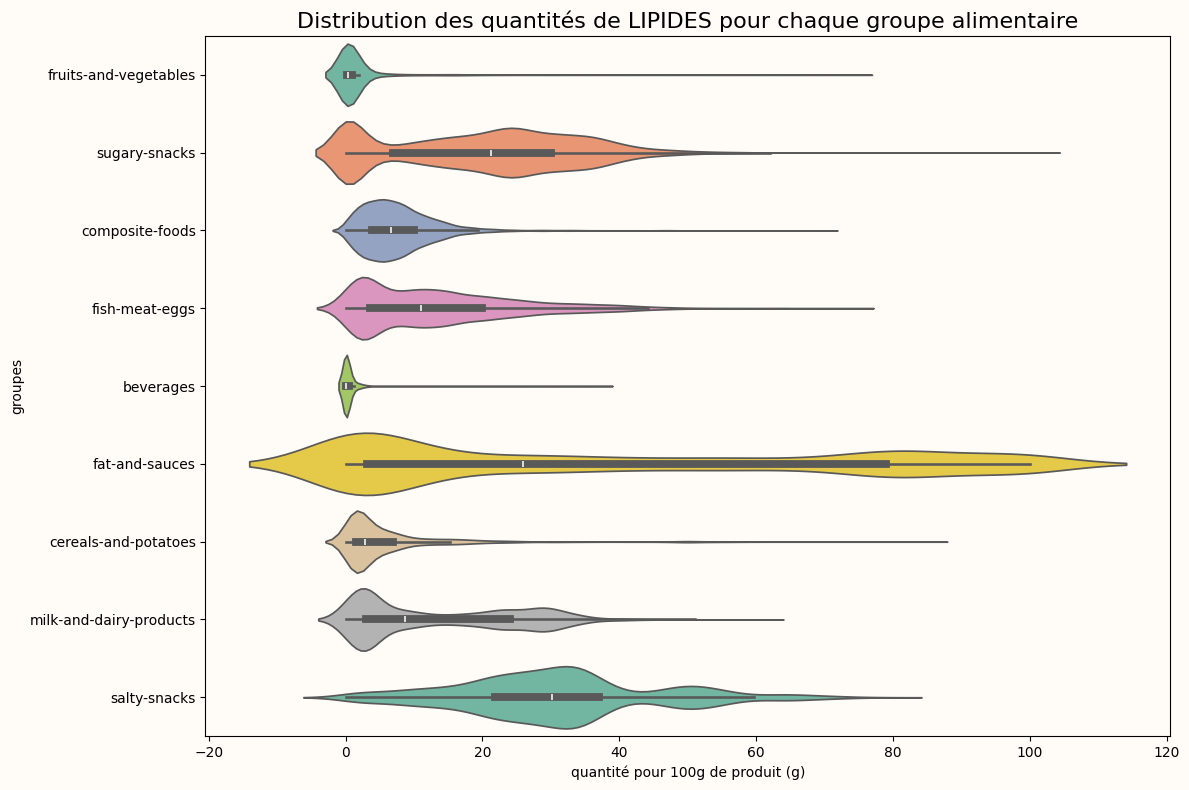

In [107]:
generate_violin_plot(
    df_to_check=df_study, 
    feature_1="pnns_groups_1", 
    feature_2="fat_100g", 
    title="Distribution des quantités de LIPIDES pour chaque groupe alimentaire", 
    x_label="quantité pour 100g de produit (g)", 
    y_label="groupes",
    palette="Set2"
)

# _______
# CONSTAT
# _______
#
# Les diagrammes montrent une variété de distributions qui correspond à ce qu'on attendrait des différents groupes alimentaires.
# Les graisses et sauces ont une distribution large et élevée, ce qui est typique pour des aliments qui sont souvent riches en lipides. 
# À l'inverse, les fruits et légumes ont une faible teneur en lipides. 
# Les données reflètent bien les profils nutritionnels attendus et fournissent une bonne base pour un système de recommandation alimentaire, car elles permettent de distinguer clairement les groupes alimentaires sur la base de leur teneur en lipides.

## <a id='toc4_7_'></a>[Analyse univariée : carbohydrates_100g](#toc0_)

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/3477531772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=feature_2, y=feature_1, data=df_temp, palette=palette)


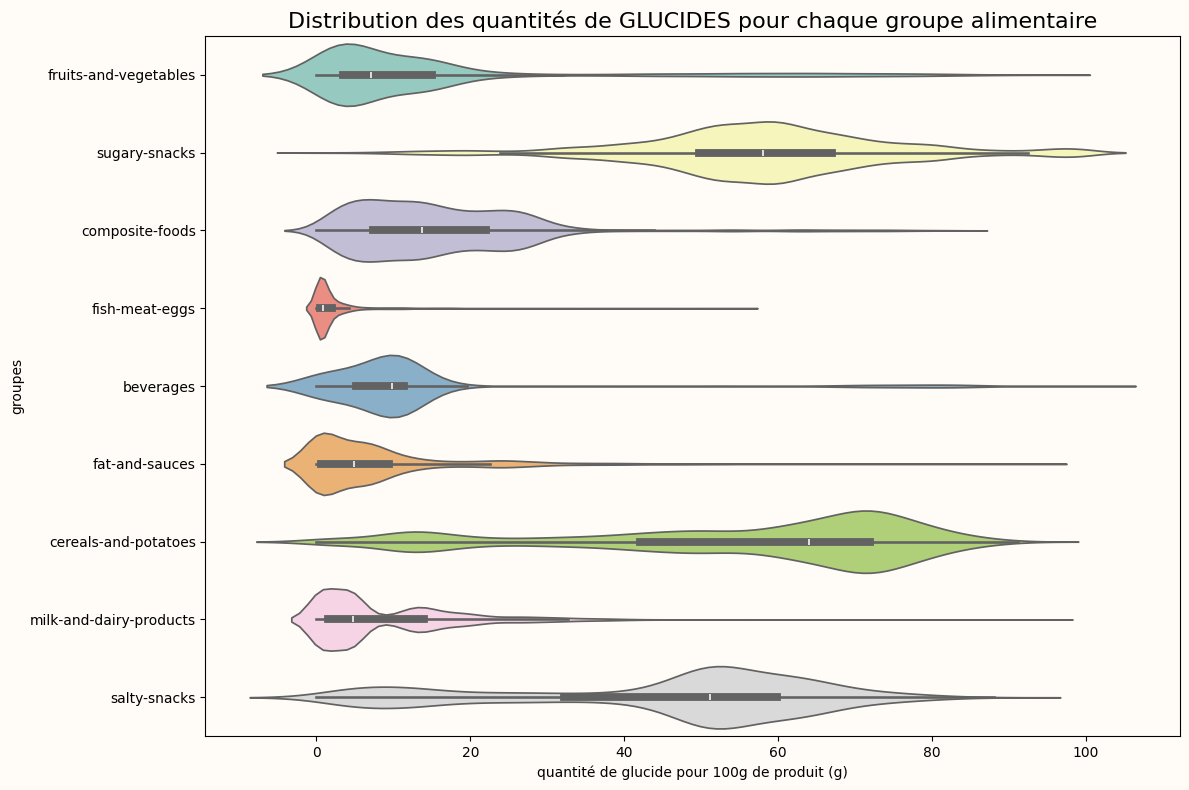

In [108]:
generate_violin_plot(
    df_to_check=df_study, 
    feature_1="pnns_groups_1", 
    feature_2="carbohydrates_100g", 
    title="Distribution des quantités de GLUCIDES pour chaque groupe alimentaire", 
    x_label="quantité de glucide pour 100g de produit (g)", 
    y_label="groupes",
    palette="Set3"
)

# _______
# CONSTAT
# _______
#
# Les diagrammes en violon pour les glucides montrent une diversité de distributions qui reflète les profils nutritionnels des différents groupes alimentaires. 
# Les snack, les céréales et les aliments composés présentent une plus grande quantité de glucides, ce qui est prévisible pour ces catégories d'aliments.

## <a id='toc4_8_'></a>[Analyse univariée : salt_100g](#toc0_)

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/3477531772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=feature_2, y=feature_1, data=df_temp, palette=palette)


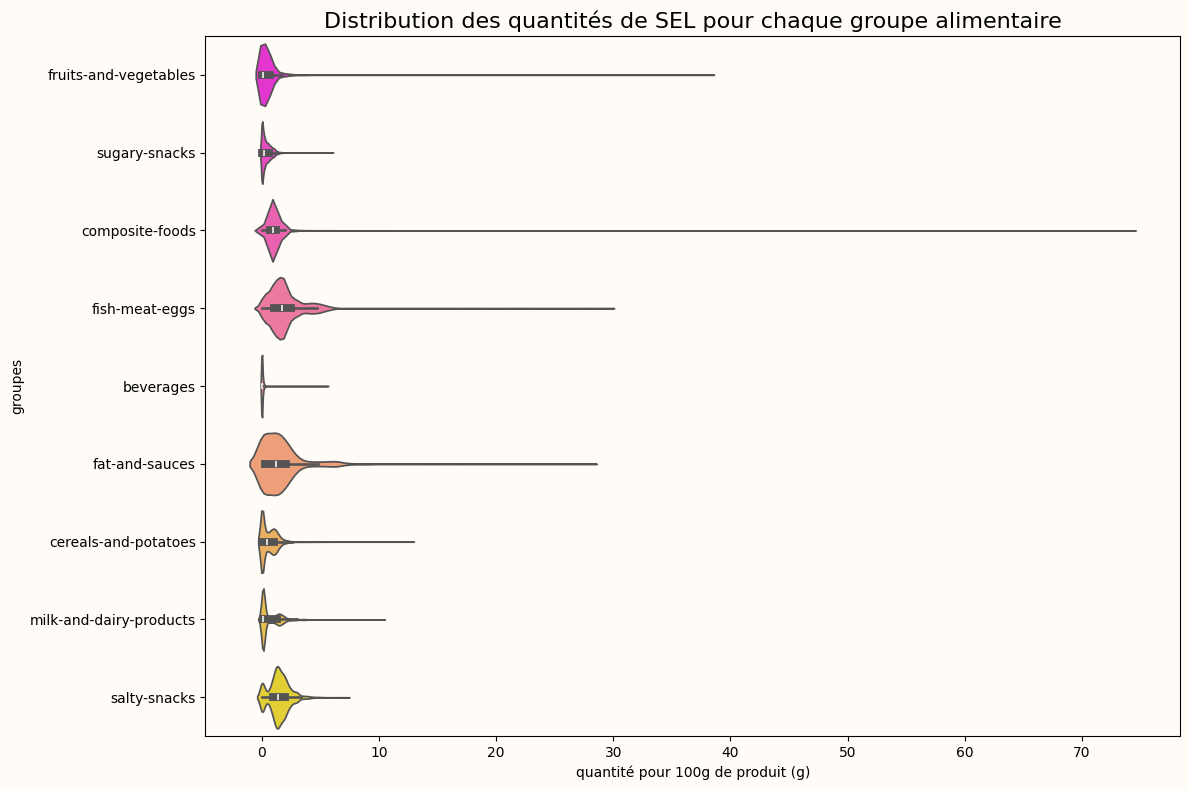

In [109]:
generate_violin_plot(
    df_to_check=df_study, 
    feature_1="pnns_groups_1", 
    feature_2="salt_100g", 
    title="Distribution des quantités de SEL pour chaque groupe alimentaire", 
    x_label="quantité pour 100g de produit (g)", 
    y_label="groupes",
    palette="spring"
)

# _______
# CONSTAT
# _______
#
# Pour les snacks salés, on attendrait généralement une teneur en sel plus élevée, mais le violon montre une distribution qui est concentrée vers les valeurs faibles avec quelques valeurs légèrement plus élevées. Cela peut indiquer une grande variété dans la catégorie, incluant des éléments à faible teneur en sel.
# Les fruits et légumes affichent également une teneur en sel basse, ce qui est conforme aux attentes, car ils sont naturellement pauvres en sel.
# Le groupe des graisses et sauces montre une distribution plus large avec des valeurs qui s'étendent vers des teneurs en sel plus élevées.

## <a id='toc4_9_'></a>[Analyse univariée : sugars_100g](#toc0_)

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/3477531772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=feature_2, y=feature_1, data=df_temp, palette=palette)


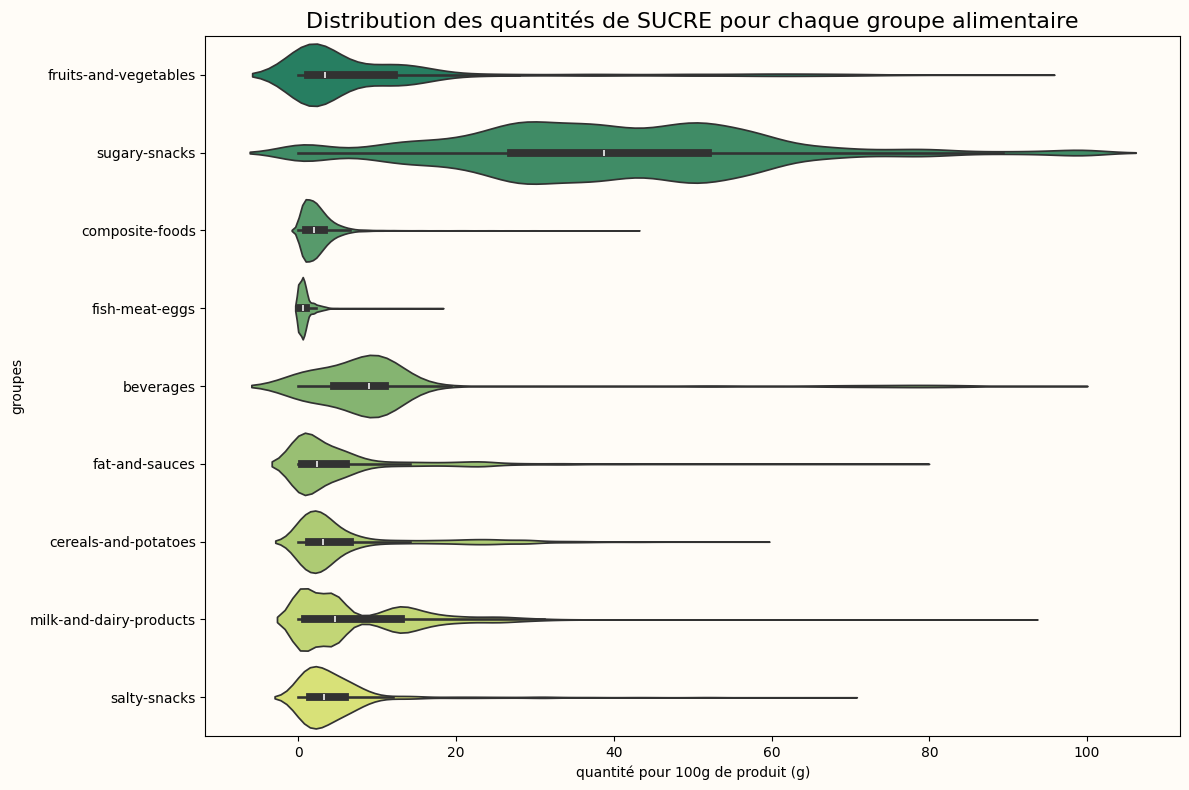

In [110]:
generate_violin_plot(
    df_to_check=df_study, 
    feature_1="pnns_groups_1", 
    feature_2="sugars_100g", 
    title="Distribution des quantités de SUCRE pour chaque groupe alimentaire", 
    x_label="quantité pour 100g de produit (g)", 
    y_label="groupes",
    palette="summer"
)

# _______
# CONSTAT
# _______
#
# Dans le diagramme en violon pour le sucre, on peut observer que :
#
# - le groupe de snacks sucrés montre une large distribution avec une médiane élevée, ce qui suggère une forte teneur en sucre pour beaucoup de ces produits. C’est cohérent avec ce que l’on attend des aliments de cette catégorie, qui sont généralement riches en sucre ajouté.
# - la distribution des brevages est relativement étroite mais s'étend sur une gamme de valeurs, reflétant la diversité des boissons, des options sans sucre aux boissons très sucrées comme les sodas et certains jus.
# - la distribution de sucre pour les fruits et légumes est basse et étroite, ce qui indique qu'ils ont généralement une faible teneur en sucre, bien que certains fruits aient une teneur en sucres naturels plus élevée.

## <a id='toc4_10_'></a>[Analyse univariée : saturated_fat_100g](#toc0_)

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/3477531772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=feature_2, y=feature_1, data=df_temp, palette=palette)


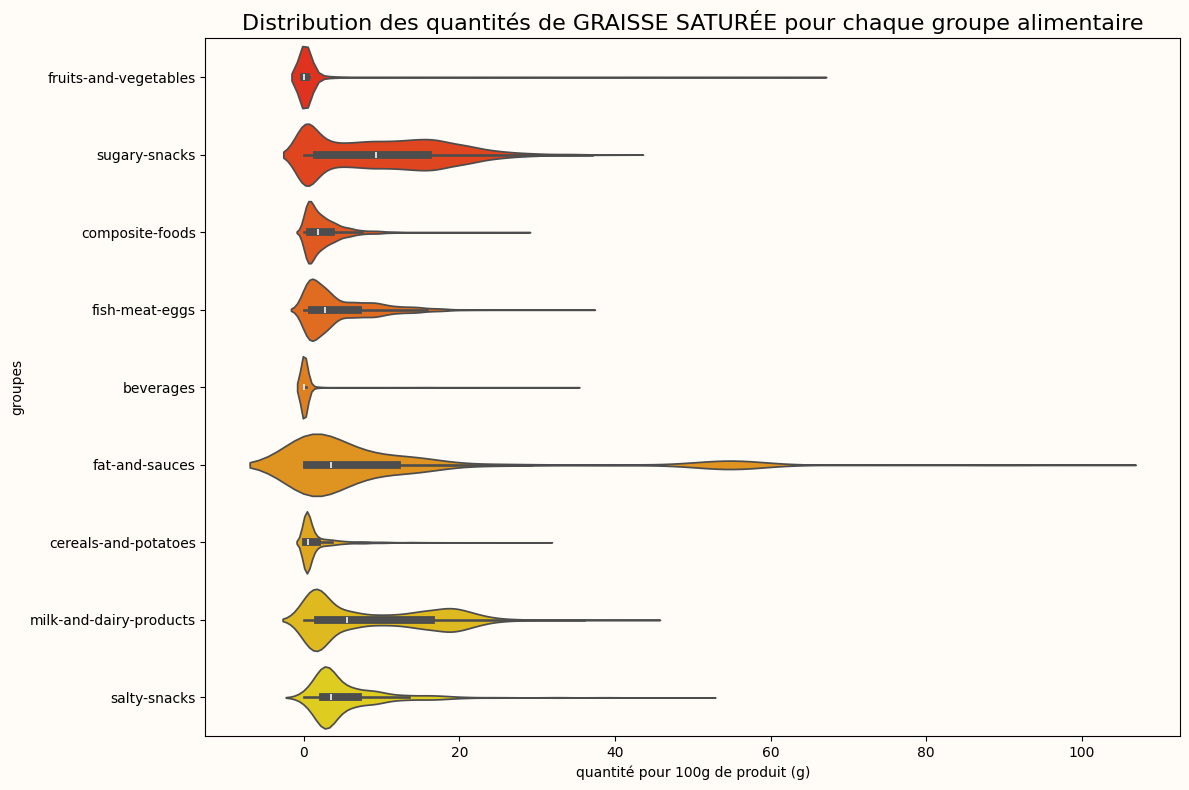

In [111]:
generate_violin_plot(
    df_to_check=df_study, 
    feature_1="pnns_groups_1", 
    feature_2="saturated_fat_100g", 
    title="Distribution des quantités de GRAISSE SATURÉE pour chaque groupe alimentaire", 
    x_label="quantité pour 100g de produit (g)", 
    y_label="groupes",
    palette="autumn"
)

# _______
# CONSTAT
# _______
#
# Les diagrammes en forme de violon illustrent la distribution de la quantité de graisse saturée par groupe alimentaire pour 100g de produit. Ils semblent effectivement refléter des tendances réalistes concernant la graisse saturée dans l'alimentation :
# Graisses et sauces : La distribution large et la médiane située vers les valeurs supérieures suggèrent une teneur en graisse saturée élevée, ce qui est attendu pour ce groupe alimentaire souvent riche en graisses telles que le beurre, la crème, et diverses huiles et sauces riches en graisses saturées.
# Snacks salés : Le diagramme montre également une distribution plus large avec une tendance vers des valeurs moyennes de graisses saturées, ce qui pourrait refléter la présence de produits à base de pomme de terre, de maïs ou de farine qui sont souvent frits ou contiennent d'autres sources de graisses saturées.
# Produits laitiers : Il y a une distribution notable avec une concentration vers les valeurs moyennes à élevées de graisse saturée, ce qui correspond à des produits comme le fromage et le beurre qui sont naturellement riches en graisses saturées.
# Les snacks sucrés indiquent une distribution relativement étroite et centrée sur une valeur plus haute, avec quelques valeurs qui s'étendent vers le haut. Cette distribution pourrait refléter une gamme de snacks sucrés qui inclut à la fois des options riches en graisses saturées et d'autres qui sont moins riches

## <a id='toc4_11_'></a>[Analyse univariée : fiber_100g](#toc0_)

/var/folders/59/q0j81gmx5h7gvpg38k8hknzw0000gn/T/ipykernel_2842/3477531772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=feature_2, y=feature_1, data=df_temp, palette=palette)


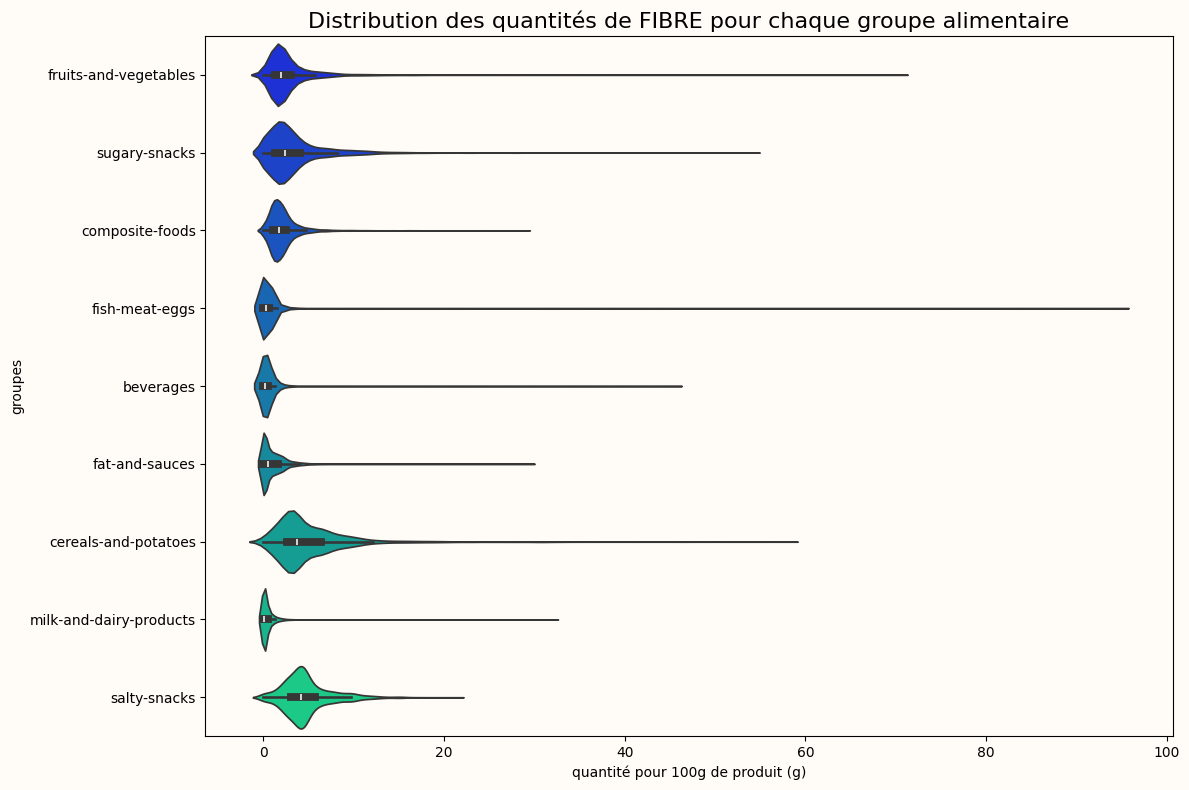

In [112]:
generate_violin_plot(
    df_to_check=df_study, 
    feature_1="pnns_groups_1", 
    feature_2="fiber_100g", 
    title="Distribution des quantités de FIBRE pour chaque groupe alimentaire", 
    x_label="quantité pour 100g de produit (g)", 
    y_label="groupes",
    palette="winter"
)

# _______
# CONSTAT
# _______
#
# Pour les fruits et légumes, la distribution des fibres est conforme aux attentes : une concentration plus élevée de fibres est typique pour ce groupe. Toutefois, la queue allongée vers les valeurs plus élevées suggère une possible présence de fruits et légumes particulièrement riches en fibres.
# Concernant les snacks salés, la représentation montre une étendue modeste, ce qui pourrait refléter la présence de snacks salés enrichis en fibres ou des produits comme les noix et les graines, qui sont naturellement riches en fibres.
# Pour les snacks sucrés, la distribution des fibres semble  basse mais avec une queue étendue vers les valeurs supérieures, ce qui peut indiquer la présence de certains snacks sucrés qui contiennent des ingrédients riches en fibres comme les céréales complètes, les fruits secs, ou des fibres ajoutées.

## <a id='toc4_12_'></a>[Analyse bivariée : fat_100g vs energy_100g](#toc0_)

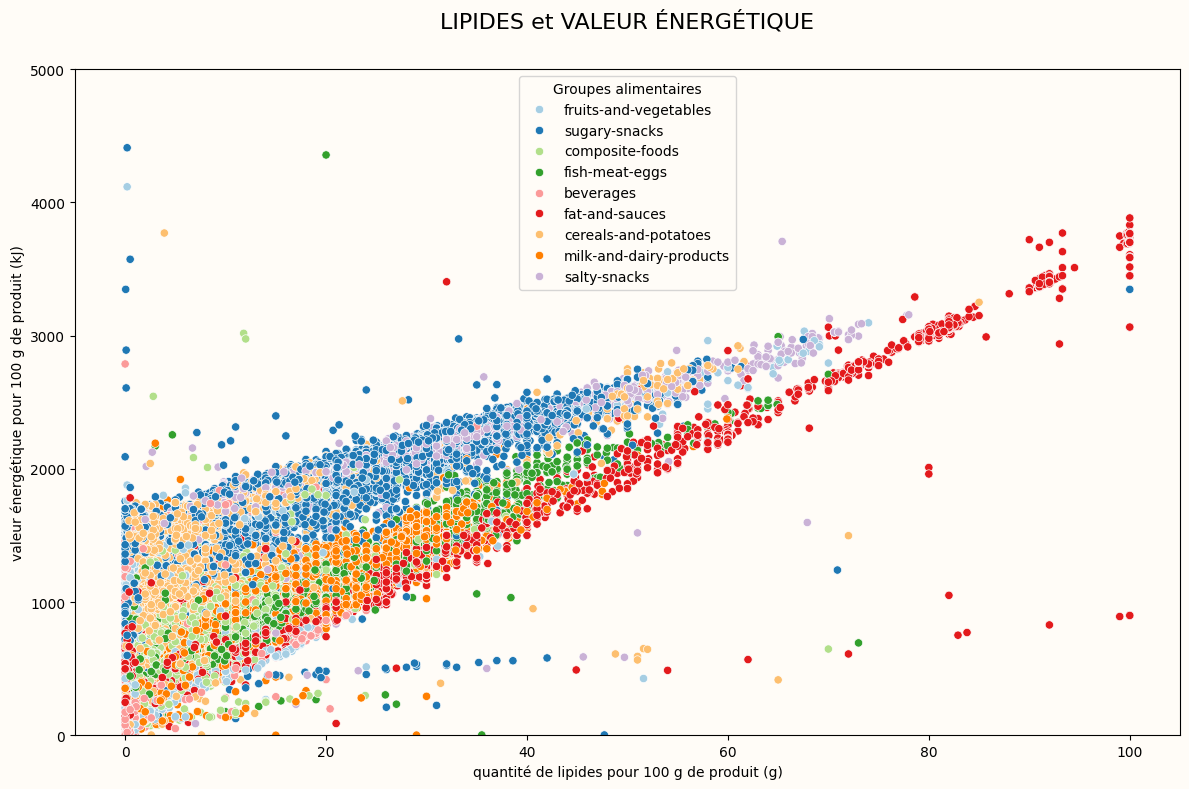

In [113]:
generate_scatter_plot(
    df_to_check=df_study,
    title="LIPIDES et VALEUR ÉNERGÉTIQUE", 
    x_label="quantité de lipides pour 100 g de produit (g)", 
    y_label="valeur énergétique pour 100 g de produit (kJ)", 
    y_lim=5_000,
    feature_1="fat_100g", 
    feature_2="energy_100g",
    palette="Paired",
    hue="pnns_groups_1",
    figsize=(12,8),
    legend_title="Groupes alimentaires"
)

# _______
# CONSTAT
# _______
# 
# Les valeurs énergétiques suivent linéairement la quantité en lipides pour chaque groupe alimentaire.
# Ces observations montrent que plus les produits contiennent des lipides plus ils sont calorifiques.

## <a id='toc4_13_'></a>[Analyse bivariée : sugars_100g vs carbohydrates_100g](#toc0_)

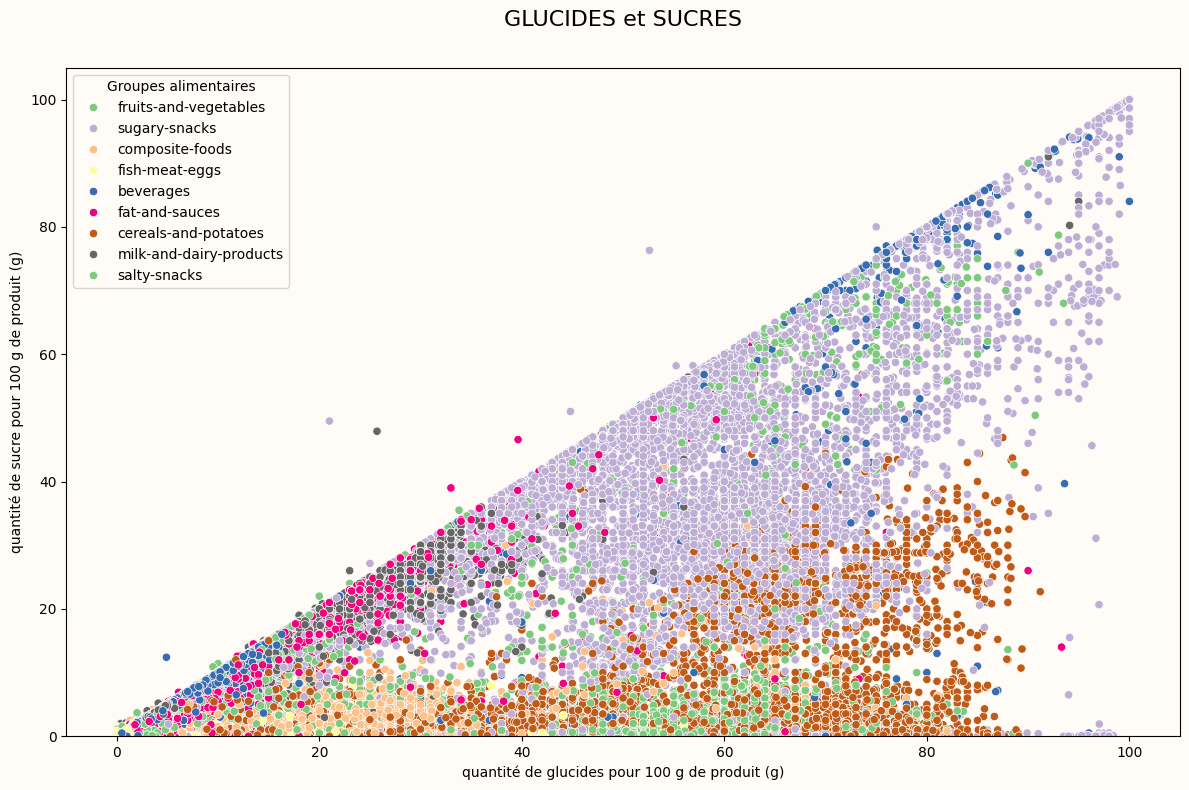

In [114]:
generate_scatter_plot(
    df_to_check=df_study,
    title="GLUCIDES et SUCRES", 
    x_label="quantité de glucides pour 100 g de produit (g)", 
    y_label="quantité de sucre pour 100 g de produit (g)", 
    y_lim=None,
    feature_1="carbohydrates_100g", 
    feature_2="sugars_100g",
    palette="Accent",
    hue="pnns_groups_1",
    figsize=(12,8),
    legend_title="Groupes alimentaires"
)

# _______
# CONSTAT
# _______
# 
# Coorrélation apparente: il y a une corrélation positive évidente entre la teneur totale en glucides et la teneur en sucres. Les points semblent s'aligner le long d'une ligne diagonale qui s'étend du bas à gauche vers le haut à droite, indiquant que, généralement, plus un produit est riche en glucides, plus il est susceptible d'être riche en sucres.
# Variété entre les groupes alimentaires : Certains groupes, comme les fruits et légumes, ont une large dispersion, indiquant une variation importante dans la teneur en sucres naturels. Les aliments sucrés montrent une concentration élevée de sucres par rapport aux autres groupes.
# Produits avec des sucres élevés : Les aliments représentés par les points qui se trouvent plus hauts sur le graphique ont une teneur en sucres particulièrement élevée pour leur teneur en glucides, ce qui pourrait indiquer la présence de sucres ajoutés ou d'une concentration naturelle de sucres, comme dans le cas de certains fruits.
# Produits avec des glucides complexes : Ceux qui se trouvent plus bas sur la ligne de corrélation pourraient être des produits avec une teneur en sucres relativement basse par rapport à leur teneur en glucides totaux, suggérant une proportion plus élevée de glucides complexes comme les céréales et les pommes de terre.
# Aliments transformés : Les aliments qui dévient de la ligne de corrélation, se trouvant plus loin de la diagonale principale, pourraient être des aliments transformés avec des profils de glucides modifiés par ajout de sucres ou autres traitements.
# Cette répartition indique que, bien que les glucides et sucres soient liés, leur présence dans les produits alimentaires varie grandement

## <a id='toc4_14_'></a>[Analyse bivariée : saturated_fat_100g vs fat_100g](#toc0_)

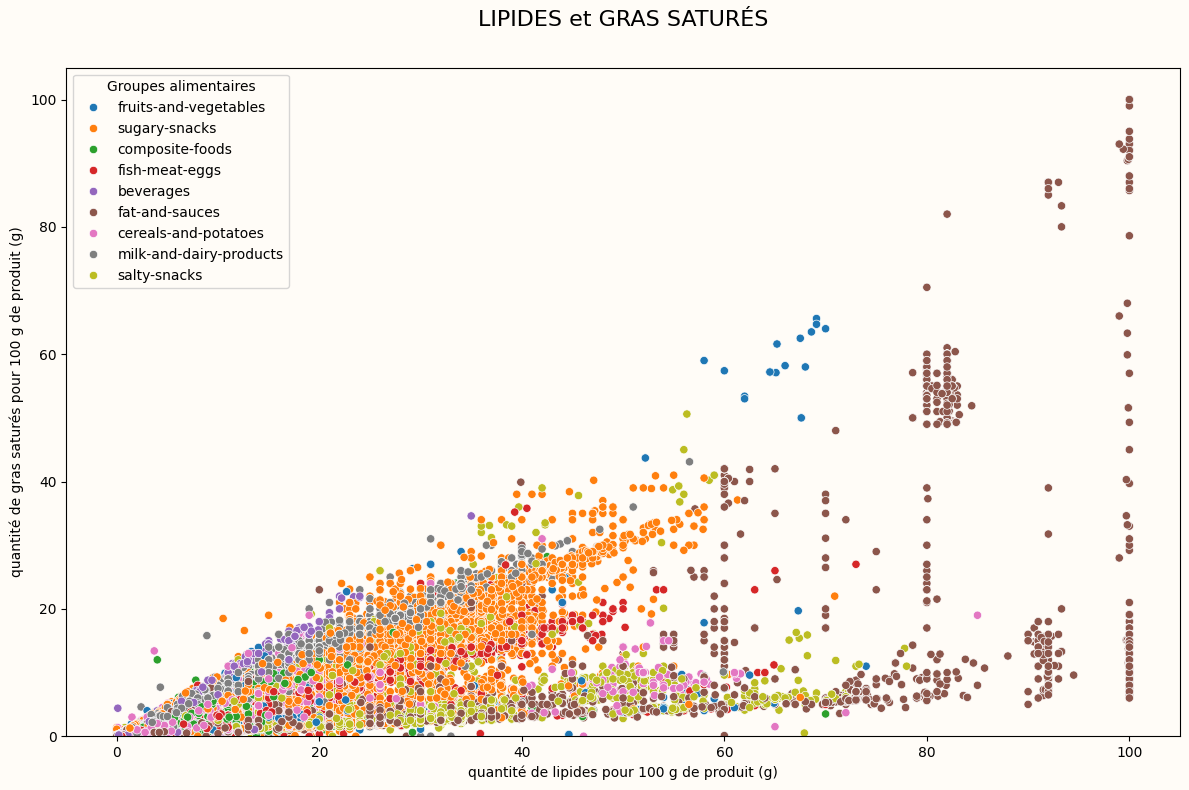

In [115]:
generate_scatter_plot(
    df_to_check=df_study,
    title="LIPIDES et GRAS SATURÉS", 
    x_label="quantité de lipides pour 100 g de produit (g)", 
    y_label="quantité de gras saturés pour 100 g de produit (g)", 
    y_lim=None,
    feature_1="fat_100g", 
    feature_2="saturated_fat_100g",
    palette="tab10",
    hue="pnns_groups_1",
    figsize=(12,8),
    legend_title="Groupes alimentaires"
)

# _______
# CONSTAT
# _______
# 
# La teneur en gras saturé suit linéairement la teneur en lipides pour l'ensemble des produits. 
# Cependant, certains groupes alimentaires, comme les huiles et les sauces, présentent une plus grande quantité de lipides totaux et de graisses saturées par rapport aux autres.
# Il y a une dispersion considérable dans la teneur en graisses saturées même au sein d'une même gamme de contenu lipidique. Cela indique que pour un même niveau de lipides totaux, la quantité de graisses saturées peut varier largement.
# Pour certains produits, une augmentation des lipides totaux ne correspond pas à une augmentation proportionnelle des graisses saturées, ce qui pourrait suggérer que ces produits contiennent une proportion plus élevée de graisses insaturées.

## <a id='toc4_15_'></a>[Analyse bivariée : ANOVA à un facteur](#toc0_)

In [116]:
# ANOVA entre les groupes alimentaires de niveau 1 et la valeur énergétique 
execute_ANOVA(
    df_to_check=df_study,
    factor="pnns_groups_1",
    feature="energy_100g"
)

# _______
# CONSTAT
# _______
# 
# L'hypothèse nulle (H0) est rejetée. Le groupe alimentaire influence la valeur énergétique.


          Impact de la variable pnns_groups_1 sur la variable energy_100g par l'analyse de la variance
          ________________________________________________________________________________________________________

          Statistique de test (F) : 6595.7046866795345
          Valeur de la p-value : inférieure à 2.2250738585072014e-308
          Seuil alpha : 0.05
          Décision : rejet de l'hypothèse nulle (H0), il y a une différence significative entre les groupes de la variable pnns_groups_1.


In [117]:
# ANOVA entre les groupes alimentaires de niveau 1 et la valeur énergétique 
execute_ANOVA(
    df_to_check=df_study,
    factor="pnns_groups_1",
    feature="energy_100g"
)

# _______
# CONSTAT
# _______
# 
# L'hypothèse nulle (H0) est rejetée. Le groupe alimentaire influence la valeur énergétique.


          Impact de la variable pnns_groups_1 sur la variable energy_100g par l'analyse de la variance
          ________________________________________________________________________________________________________

          Statistique de test (F) : 6595.7046866795345
          Valeur de la p-value : inférieure à 2.2250738585072014e-308
          Seuil alpha : 0.05
          Décision : rejet de l'hypothèse nulle (H0), il y a une différence significative entre les groupes de la variable pnns_groups_1.


In [118]:
# ANOVA entre les groupes alimentaires de niveau 1 et la quantité de GLUCIDES
execute_ANOVA(
    df_to_check=df_study,
    factor="pnns_groups_1",
    feature="carbohydrates_100g"
)

# _______
# CONSTAT
# _______
# 
# L'hypothèse nulle (H0) est rejetée. Le groupe alimentaire influence la teneur en glucides.


          Impact de la variable pnns_groups_1 sur la variable carbohydrates_100g par l'analyse de la variance
          ________________________________________________________________________________________________________

          Statistique de test (F) : 13026.658798813798
          Valeur de la p-value : inférieure à 2.2250738585072014e-308
          Seuil alpha : 0.05
          Décision : rejet de l'hypothèse nulle (H0), il y a une différence significative entre les groupes de la variable pnns_groups_1.


In [119]:
# ANOVA entre les groupes alimentaires de niveau 1 et la quantité de LIPIDES
execute_ANOVA(
    df_to_check=df_study,
    factor="pnns_groups_1",
    feature="fat_100g"
)

# _______
# CONSTAT
# _______
# 
# L'hypothèse nulle (H0) est rejetée. Le groupe alimentaire influence la teneur en lipides.


          Impact de la variable pnns_groups_1 sur la variable fat_100g par l'analyse de la variance
          ________________________________________________________________________________________________________

          Statistique de test (F) : 3412.3880440654193
          Valeur de la p-value : inférieure à 2.2250738585072014e-308
          Seuil alpha : 0.05
          Décision : rejet de l'hypothèse nulle (H0), il y a une différence significative entre les groupes de la variable pnns_groups_1.


In [120]:
# ANOVA entre les groupes alimentaires de niveau 1 et la quantité de PROTÉINES
execute_ANOVA(
    df_to_check=df_study,
    factor="pnns_groups_1",
    feature="proteins_100g"
)

# _______
# CONSTAT
# _______
# 
# L'hypothèse nulle (H0) est rejetée. Le groupe alimentaire influence la teneur en protéines.


          Impact de la variable pnns_groups_1 sur la variable proteins_100g par l'analyse de la variance
          ________________________________________________________________________________________________________

          Statistique de test (F) : 5886.202964638652
          Valeur de la p-value : inférieure à 2.2250738585072014e-308
          Seuil alpha : 0.05
          Décision : rejet de l'hypothèse nulle (H0), il y a une différence significative entre les groupes de la variable pnns_groups_1.


# <a id='toc5_'></a>[4 - Analyse multivariée](#toc0_)

## <a id='toc5_1_'></a>[Fonctions ré-utilisables](#toc0_)

In [121]:
# Fonction pour générer un graphe de corrélation à parti d'un PCA, de deux composantes principales et d'une liste de features
from adjustText import adjust_text

def generate_pca_correlation_graph(
        pca, 
        title: str = None,
        x_y: tuple = (1,2), 
        features = None,
        figsize=(10, 9)):

    x, y = x_y  # Décomposition des indices des composantes principales
    fig, ax = plt.subplots(figsize=figsize)  # Initialisation de la figure

    # Parcours des features pour dessiner les flèches et ajouter des labels
    for i in range(pca.components_.shape[1]):
        ax.arrow(0, 0, pca.components_[x-1, i], pca.components_[y-1, i], head_width=0.04, head_length=0.04, width=0.01, edgecolor='none')
    texts = [plt.text(pca.components_[x-1, i] + 0.105, pca.components_[y-1, i] + 0.05, features[i]) for i in range(len(features))]
    adjust_text(texts)

    # Ajout des lignes de référence horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Configuration des noms des axes avec le pourcentage d'inertie expliquée
    plt.xlabel(f'F{x} ({round(100*pca.explained_variance_ratio_[x-1],1)}%)')
    plt.ylabel(f'F{y} ({round(100*pca.explained_variance_ratio_[y-1],1)}%)')

    # Titre du graphique indiquant les composantes analysées
    plt.title(f"{title} (sur F{x} et F{y})")

    # Dessin du cercle unitaire pour référence d'échelle
    plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)))

    # Ajustement des axes et affichage du graphique
    plt.axis('equal')
    plt.savefig(f"../images/correlation_graph_F{x}_F{y}")
    plt.show(block=False)

In [122]:
# Fonction pour générer un diagramme de dispersion de la projection des individus sur le plans factoriel spécifié
def generate_pca_factorial_plane(
        X_projected: pd.DataFrame, 
        title:str = None,
        Fx_Fy: tuple = (1,2), 
        pca=None, 
        hue: pd.Series = None, 
        legend_title: str = None,
        figsize: tuple = (18,12), 
        ax_lim=None):
    
    x, y = Fx_Fy  # Axes à afficher
    fig, ax = plt.subplots(figsize=figsize)
    
    # Paramètres des axes
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    
    
    # Transforme X_projected en np.array
    X_projected_array = np.array(X_projected)

    # Affichage des points
    sns.scatterplot(data=None, x=X_projected_array[:, x-1], y=X_projected_array[:, y-1], hue=hue)

    # Affichage de la variance expliquée si pca est fourni
    if pca is not None:
        ax.set_xlabel(f'F{x} ({round(100*pca.explained_variance_ratio_[x-1], 1)}%)')
        ax.set_ylabel(f'F{y} ({round(100*pca.explained_variance_ratio_[y-1], 1)}%)')
    else:
        ax.set_xlabel(f'F{x}')
        ax.set_ylabel(f'F{y}')
    
    # Ajout des lignes de référence
    ax.axhline(0, color='grey', linestyle='--', alpha=0.8)
    ax.axvline(0, color='grey', linestyle='--', alpha=0.8)
    
    plt.title(f"{title} (sur F{x} et F{y})", fontsize=16)
    plt.legend(title=legend_title)
    plt.savefig(f"../images/factorial_plane_F{x}_F{y}")
    plt.show()

## <a id='toc5_2_'></a>[Corrélations entre les variables explicatives numériques continues](#toc0_)

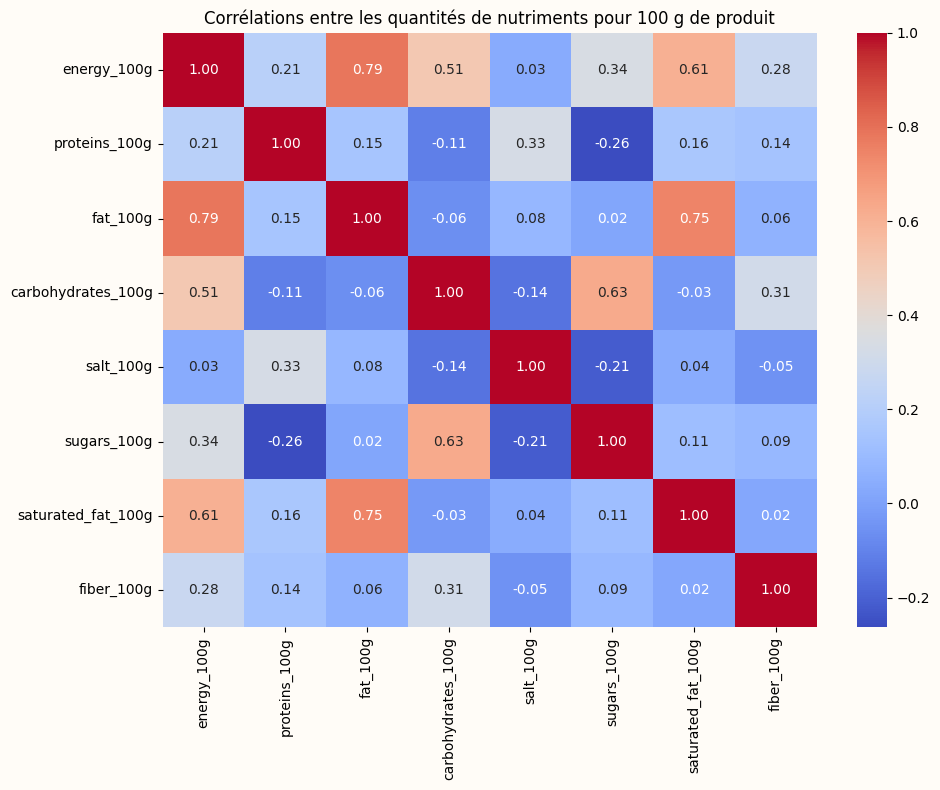

In [123]:
corr = df_study[["energy_100g"] + cols_nutrients].corr(method="pearson")
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
ax.set_title("Corrélations entre les quantités de nutriments pour 100 g de produit")

plt.tight_layout()

ax.figure.savefig("../images/heat_map_nutrients")

# _______
# CONSTAT
# _______
# 
# Les indices de corrélation du tableau montrent que :
# - la teneur en matière grasse et en acide gras saturé est positivement corrélée avec la valeur calorifique d'un produit
# - la teneur en matière grasse est aussi positivement corrélée à la teneur en acide gras saturé
# - la teneur en sucre est corrélée égativement à la teneur en sel
# - la teneur en sucre est corrélée égativement à la teneur en protéine
#
# Ces observations semblent représenter fidèlement la composition biochimique des produits répertoriés dans la base de données.

## <a id='toc5_3_'></a>[Analyse en Composantes Principales (ACP)](#toc0_)

### <a id='toc5_3_1_'></a>[Séparation des données](#toc0_)

In [124]:
# Sélection des données
df_pca = df_study[["energy_100g"] + cols_nutrients]
display(df_pca.head())
X = df_pca.values

X.shape

energy_100g  proteins_100g  fat_100g  carbohydrates_100g  salt_100g  \
0       1210.0          22.00     12.00               23.00      2.160   
1       1520.0           4.79     14.40               54.10      0.922   
2       1090.0           3.33     10.70               38.70      0.647   
3        478.0           5.36      6.79                7.86      0.499   
4        751.0          33.90     10.20               16.60      0.735   

   sugars_100g  saturated_fat_100g  fiber_100g  
0        0.000               7.000    2.000000  
1       28.100               2.575    2.050000  
2       24.700               2.000    2.000000  
3        0.714               2.860    0.357000  
4        5.690               1.380   20.533333

(51630, 8)

In [125]:
# Retenir le nom des features sélectionnées
pca_features = df_pca.columns
pca_features

Index(['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'salt_100g', 'sugars_100g', 'saturated_fat_100g', 'fiber_100g'],
      dtype='object')

### <a id='toc5_3_2_'></a>[Centrage et réduction des données](#toc0_)

In [126]:
# Instance du scaler
scaler = StandardScaler()

# Standardisation des données
X_scaled = scaler.fit_transform(X)

# Vérification del a moyenne et de l'écart-type qui doivent être égaux respectivement à 0 et 1
pd.DataFrame(X_scaled).describe().round(2).loc[["mean", "std"], :]

0    1    2    3    4    5    6    7
mean  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

### <a id='toc5_3_3_'></a>[Entraînement du modèle PCA et détermination des valeurs propres](#toc0_)

In [127]:
# Instance du modèle avec 6 composantes
n_components=8
pca = PCA(n_components=n_components)

# Entraînement du modèle
pca.fit(X_scaled)

# Vérification de la variance captée par chaque composante
scree = (pca.explained_variance_ratio_ * 100).round(2)
scree


array([33.32, 24.54, 15.33, 10.91,  7.49,  4.99,  3.17,  0.26])

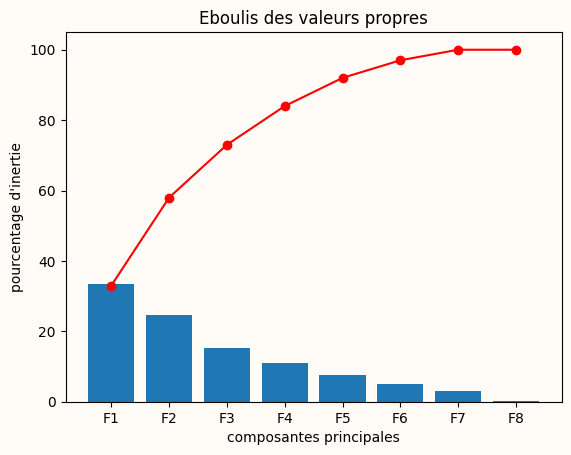

<Figure size 640x480 with 0 Axes>

In [128]:
# Somme cumulée de la variance captée par les composantes
scree_cum = scree.cumsum().round()

# Liste des composantes
f_list = [f"F{i}" for i in range(1, n_components+1)]

# Visualisation de l'éboulis des valeurs propres
plt.bar(f_list, scree)
plt.plot(f_list, scree_cum,c="red",marker='o')
plt.xlabel("composantes principales")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
plt.savefig("../images/bar_plot_pca_scree")

# _______
# CONSTAT
# _______
# 
# Nous remarquons que le premier factoriel formé par F1 et F2 capte environ 60% de la variance.
# Nous pourrons donc nous appuyer uniquement sur ce premier plan factoriel pour nos analyses.

### <a id='toc5_3_4_'></a>[Composantes principales](#toc0_)

In [129]:
# Dataframe des composantes principales
df_pcs = pd.DataFrame(pca.components_)
df_pcs.columns = pca_features
df_pcs.index = [f"{i}" for i in f_list]
df_pcs.T

F1        F2        F3        F4        F5  \
energy_100g         0.587676 -0.012523  0.050630  0.046184 -0.033882   
proteins_100g       0.125128  0.389451  0.529424  0.011669 -0.714364   
fat_100g            0.497541  0.289256 -0.259793 -0.094811  0.152774   
carbohydrates_100g  0.273842 -0.523453  0.283787  0.228176 -0.096298   
salt_100g           0.010495  0.370362  0.396026  0.653450  0.521375   
sugars_100g         0.248753 -0.516565 -0.070948  0.362346 -0.110055   
saturated_fat_100g  0.464140  0.246427 -0.305252 -0.042377 -0.000790   
fiber_100g          0.197560 -0.160514  0.560419 -0.613669  0.414703   

                          F6        F7        F8  
energy_100g         0.382760 -0.138655  0.694914  
proteins_100g      -0.146676 -0.090810 -0.110308  
fat_100g            0.208332 -0.430261 -0.583469  
carbohydrates_100g  0.384685  0.444158 -0.404816  
salt_100g          -0.080473  0.024080  0.000067  
sugars_100g        -0.589955 -0.418079 -0.002424  
saturated_fat_100g -0.464544  0.642364  0.020986  
fiber_100g         -0.265089 -0.046115 -0.012983

### <a id='toc5_3_5_'></a>[Liaisons entre les variables : cercle des corrélations](#toc0_)

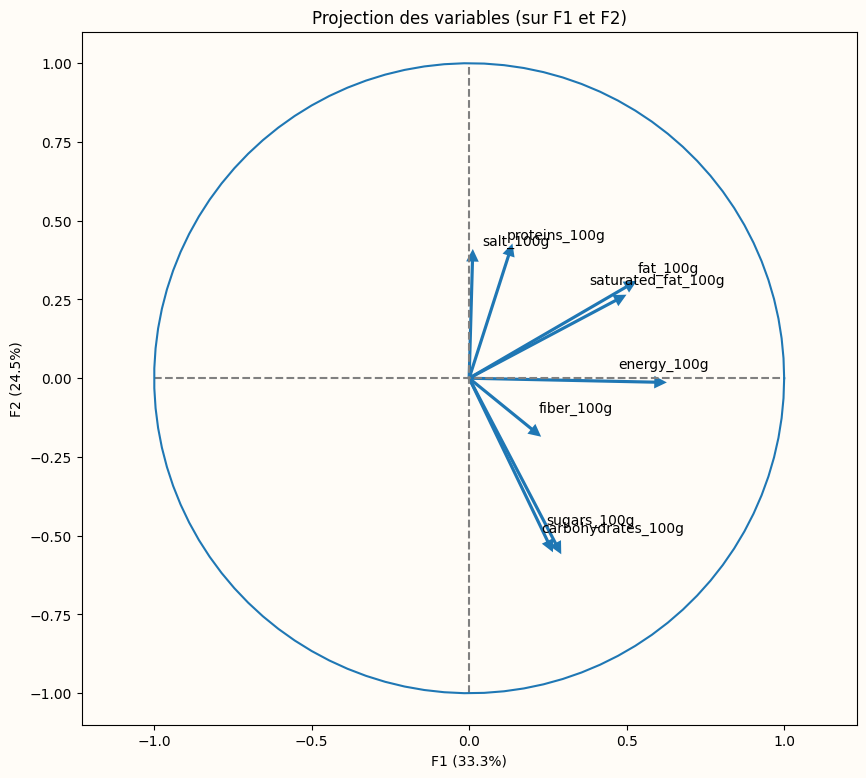

In [130]:
# Cercle des corrélations pour le premier plan factoriel
generate_pca_correlation_graph(pca, title="Projection des variables", x_y=(1,2), features=pca_features)

# _______
# CONSTAT
# _______
# 
# Les variables les mieux représentées sur F1 sont fat_100g, saturated_100g et energy_100g. Ces 3 variables sont corrélées dans le sens positif de l'axe.
# Nous pouvons considérer que F1 permettra d'observer des produits plus ou moins gras et plus ou moins calorifiques
#
# Les variables les mieux représentées sur F2 sont sugars_100g, saturated_100g qui sont corrélées dans le sens négatif de l'axe et salt_100g et proteins_100g qui sont corrélées dans le sens positif de l'axe.
# Nous pouvons considérer que F2 permettra d'observer des produits plus ou moins sucrés et plus ou moins protéinés

Text(220.58159722222223, 0.5, 'variables nutritionnelles')

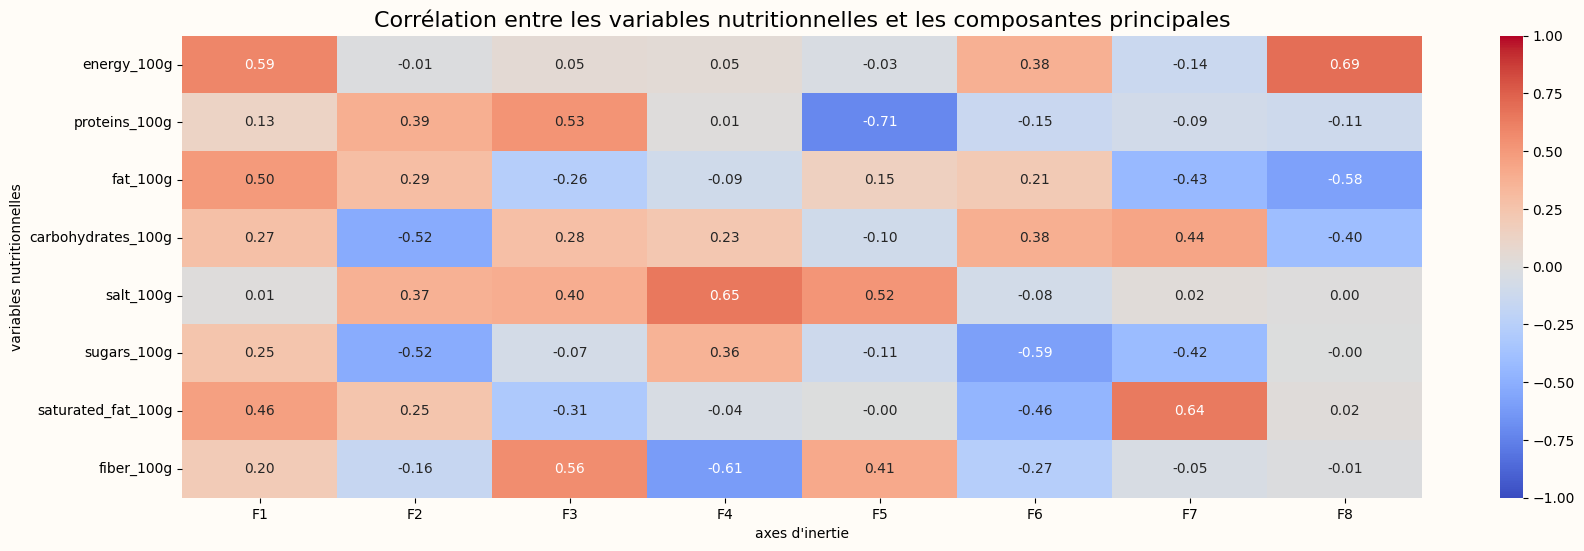

In [131]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Corrélation entre les variables nutritionnelles et les composantes principales", fontsize=16)
plt.xlabel("axes d'inertie")
plt.ylabel("variables nutritionnelles")
# _______
# CONSTAT
# _______
# 
# La heatmap précise le niveau de représentation des variables nutritionnelles sur les différentes composantes. Elle précise aussi le niveau de corrélation entre les différentes variables.
# Pour F1 nous retiendrons donc : energy_100g, fat_100g et saturated_fat_100g
# Pour F2 nous retiendrons donc : sugars_100g, carbohydrates_100g, proteins_100g et salt_100g

### <a id='toc5_3_6_'></a>[Variabilité entre les individus : représentation des individus sur les plans factoriels](#toc0_)

In [132]:
# Projection des données initiales (centrées/réduites) sur le nouvel espace défini par les composantes principales
X_proj = pca.transform(X_scaled)

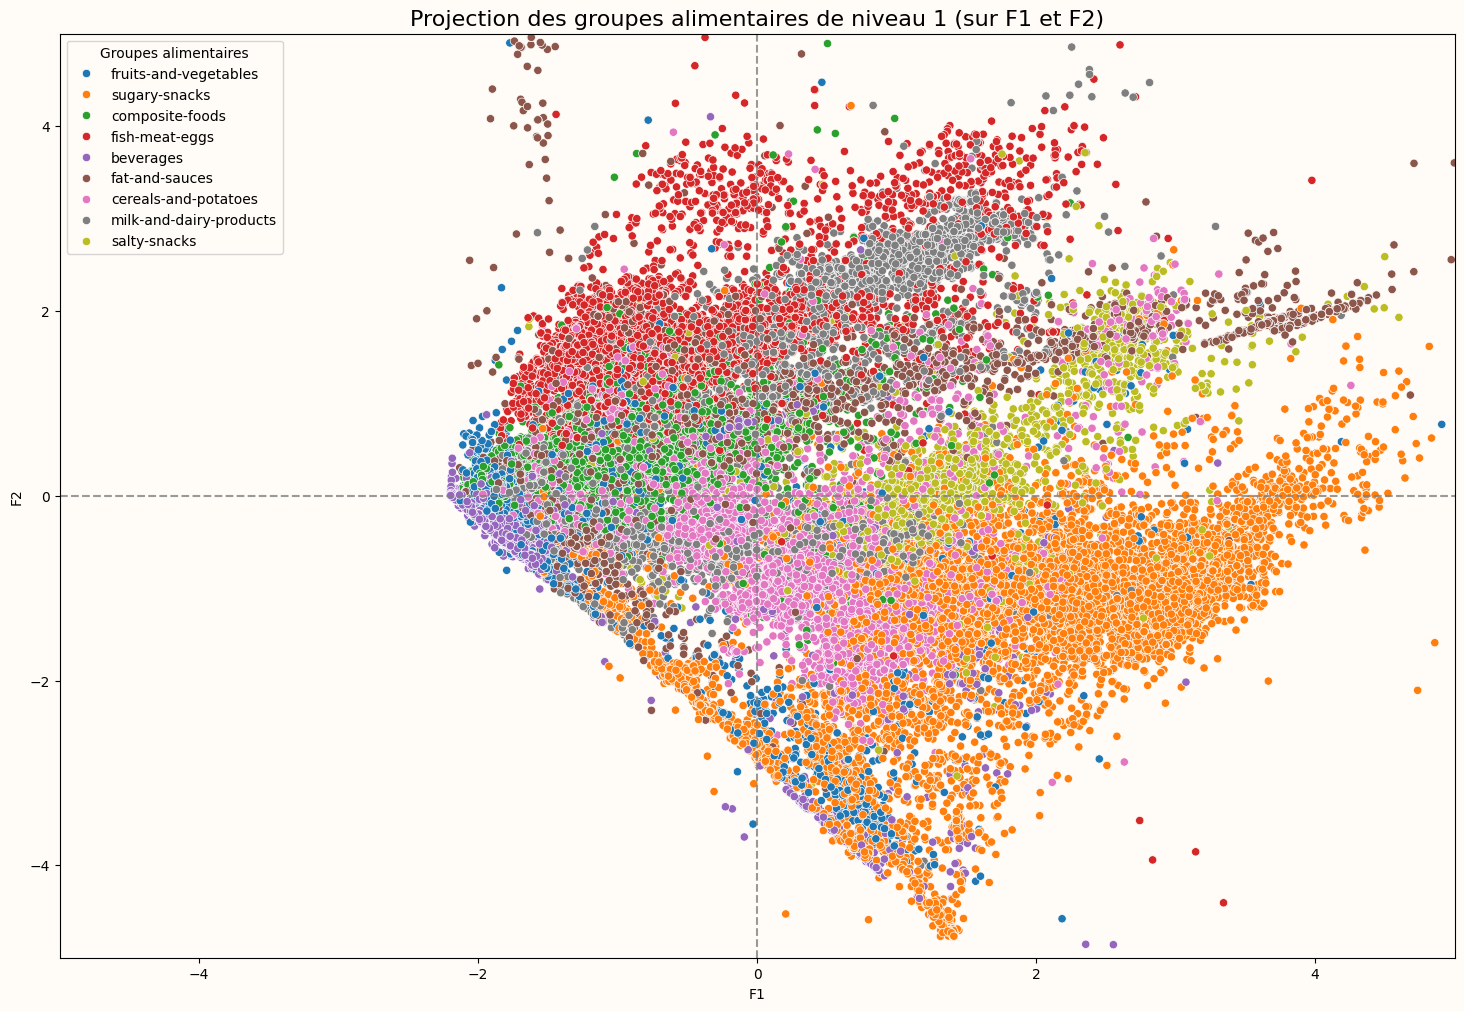

In [133]:
# Diagramme de dispersion pour le premier plan factoriel
generate_pca_factorial_plane(
    X_proj,title="Projection des groupes alimentaires de niveau 1", 
    Fx_Fy=(1,2), 
    hue=df_study['pnns_groups_1'], 
    legend_title="Groupes alimentaires", ax_lim=5
)

# _______
# CONSTAT
# _______
# 
# Les données à notre diposition semblent cohérentes et confirment les analyses univariées que nous avons réalisées précédemment :
# - les snacks et produits sucrés sont dans la zone inférieure droite qui est la zone regroupant les produits riches en sucre et en calorie
# - les snacks salés sont dans la zone supérieure droite qui est la zone regroupant les produits riches en sel et en calorie
# - les viandes et poissons sont dans la zone supérieure et positionnés par rapport à F2 de telle sorte qu'ils représentent des produits riches en protéines et modérément riche voire faible en calorie